# PISA 2012: Learning success and environmental variables
**by Krunoslav Miskovic**

## Introduction

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. The PISA survey looks at how well prepared they are for life beyond school. A huge number of students (~500.000) in 65 countries participated in these tests of reading, mathematics and science.  TO examine these fields of expertise I'm going to use three variables, that stand for these fields of expertise and some categorical and numerical environmental variables. As an educational scientist I know how important environmental variables for the learning success can be. This motivated me to analyze the relation between the success in reading, mathematics and science and environmental variables like digital infrastructure.

## Preliminary Wrangling
### Importing the necessary packages

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Basic Statistics and visual assessment

In [2]:
df = pd.read_csv('pisa2012.csv',encoding='latin-1')
#df = pd.read_csv('pisa2012new.csv',encoding='latin-1')

/Users/kruno/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.head())
print(df.shape)

   Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
0           1  Albania     80000  ALB0006  Non-OECD  Albania         1   
1           2  Albania     80000  ALB0006  Non-OECD  Albania         1   
2           3  Albania     80000  ALB0006  Non-OECD  Albania         1   
3           4  Albania     80000  ALB0006  Non-OECD  Albania         1   
4           5  Albania     80000  ALB0006  Non-OECD  Albania         1   

   STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0        1       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
1        2       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
2        3        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
3        4        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
4        5        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   

   W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0    4.3389  13.0829       19        1     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [5]:
df.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,242745.500000,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,...,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,140149.035431,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,...,120.684726,122.946533,121.170883,119.267686,122.981541,119.479516,119.799018,22.951264,0.539759,0.137864
min,1.000000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000,...,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,1.000000,1.000000,0.000500
25%,121373.250000,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000,...,4.660300,4.664800,4.643100,4.667000,4.675200,4.651850,4.660300,20.000000,1.000000,0.037800
50%,242745.500000,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000,...,13.637700,13.698900,13.611700,13.672100,13.731100,13.582000,13.600200,40.000000,2.000000,0.145200
75%,364117.750000,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000,...,41.233500,41.512500,41.695200,41.097300,41.189600,41.290925,41.356000,60.000000,2.000000,0.199900
max,485490.000000,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000,...,2476.566800,4155.283000,3743.450100,3232.163700,3904.868100,3607.478300,3412.174100,80.000000,3.000000,5.095500


In [6]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [7]:
#list(df.columns)

In [8]:
df_dict = pd.read_csv('pisadict2012.csv',encoding='latin-1')
#df_dict.head(60)

### Summary

The original dataset is strucutred as a table with 636 columns and almost 500.000 rows. There is an additional csv file, that explains the shortcuts of the columns.
As stated above I'm interested in environmental variables and how they relate to the performance of math, reading and scientific work. To do this I'm going to reduce the datset to the needed columns.
These are the columns that can help me to investigate the influence of environmental variables on learning succcess:

- NC        Country
- PV1READ   Performance indicator reading
- PV1MATH   Performance indicator math
- PV1SCIE   Performance indicator science
- ST11Q01 	At Home - Mother
- ST11Q02 	At Home - Father
- ST26Q01 	Possessions - desk
- ST26Q02 	Possessions - own room
- ST26Q03 	Possessions - study place
- ST26Q04 	Possessions - computer
- ST26Q05 	Possessions - software
- ST26Q06 	Possessions - Internet
- ST26Q07   Possessions - Literature
- ST26Q08   Possessions - Poetry
- ST26Q10   Possessions - Textbook
- PARED 	Highest parental education in years
- HOMEPOS
- WEALTH

In the first step I'm going to reduce the dataframe. Before I do this I'm going to make a copy of the dataframe.

In [9]:
df_master = df.copy()

To make the dataframe easier to read and understand I'm going to rename the columns I need

In [10]:
df_master.rename(columns={'NC': 'COUNTRY', 'ST11Q01':'MOM_HOM', 'ST11Q02':'DAD_HOM', 'ST26Q01':'DESK', 'ST26Q02':'ROOM', 'ST26Q03':'PLACE', 'ST26Q04':'CPU', 'ST26Q05':'SW', 'ST26Q06':'NET', 'ST57Q03':'TUT', 'PV1MATH':'MATH','PV1READ':'READ', 'PV1SCIE':'SCIE', 'ST26Q07': 'LIT', 'ST26Q08': 'POET', 'ST26Q10': 'TEXT'}, inplace=True)

List of columns in pythonic syntax

In [11]:
list_columns = ['COUNTRY', 'MOM_HOM', 'DAD_HOM', 'SCIE', 'DESK', 'ROOM', 'PLACE', 'CPU', 'SW', 'NET', 'READ', 'MATH', 'PARED', 'HOMEPOS', 'WEALTH', 'LIT', 'POET', 'TEXT']#'TUT', 'OUTHOURS',

In [12]:
for i in df_master.columns:
    if i not in list_columns:
        df_master.drop(i, axis=1, inplace = True)

Check the basic stats of the new dataframe

In [13]:
#df_master.tail(50)

In [14]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   COUNTRY  485490 non-null  object 
 1   MOM_HOM  460559 non-null  object 
 2   DAD_HOM  441036 non-null  object 
 3   DESK     473079 non-null  object 
 4   ROOM     469693 non-null  object 
 5   PLACE    472020 non-null  object 
 6   CPU      473877 non-null  object 
 7   SW       463178 non-null  object 
 8   NET      473182 non-null  object 
 9   LIT      465860 non-null  object 
 10  POET     467094 non-null  object 
 11  TEXT     471242 non-null  object 
 12  HOMEPOS  479807 non-null  float64
 13  PARED    473091 non-null  float64
 14  WEALTH   479597 non-null  float64
 15  MATH     485490 non-null  float64
 16  READ     485490 non-null  float64
 17  SCIE     485490 non-null  float64
dtypes: float64(6), object(12)
memory usage: 66.7+ MB


Check missing values and drop them

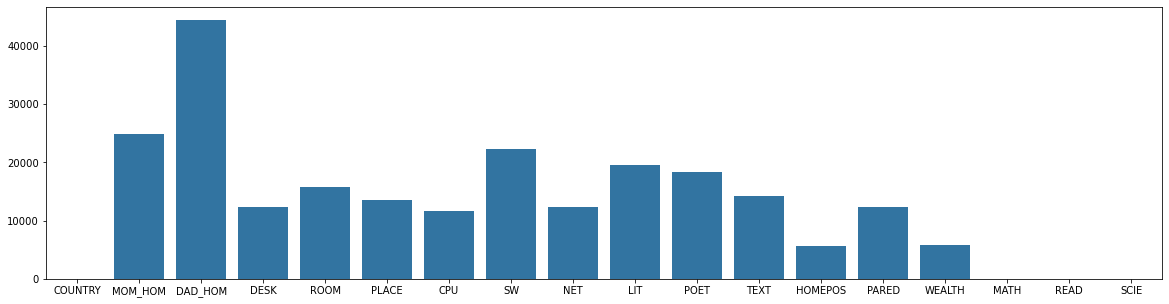

In [15]:
na_counts = df_master.isna().sum()
base_color = sns.color_palette()[0]
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot(na_counts.index.values, na_counts, color = base_color);

In [16]:
df_master = df_master.dropna()

In [17]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409686 entries, 0 to 485488
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   COUNTRY  409686 non-null  object 
 1   MOM_HOM  409686 non-null  object 
 2   DAD_HOM  409686 non-null  object 
 3   DESK     409686 non-null  object 
 4   ROOM     409686 non-null  object 
 5   PLACE    409686 non-null  object 
 6   CPU      409686 non-null  object 
 7   SW       409686 non-null  object 
 8   NET      409686 non-null  object 
 9   LIT      409686 non-null  object 
 10  POET     409686 non-null  object 
 11  TEXT     409686 non-null  object 
 12  HOMEPOS  409686 non-null  float64
 13  PARED    409686 non-null  float64
 14  WEALTH   409686 non-null  float64
 15  MATH     409686 non-null  float64
 16  READ     409686 non-null  float64
 17  SCIE     409686 non-null  float64
dtypes: float64(6), object(12)
memory usage: 59.4+ MB


## Univariate Exploration

In this part of the work I'm going to check the distribution of the values. For the numerical variables I will use a histogram to visualize the data.
### Numerical variables

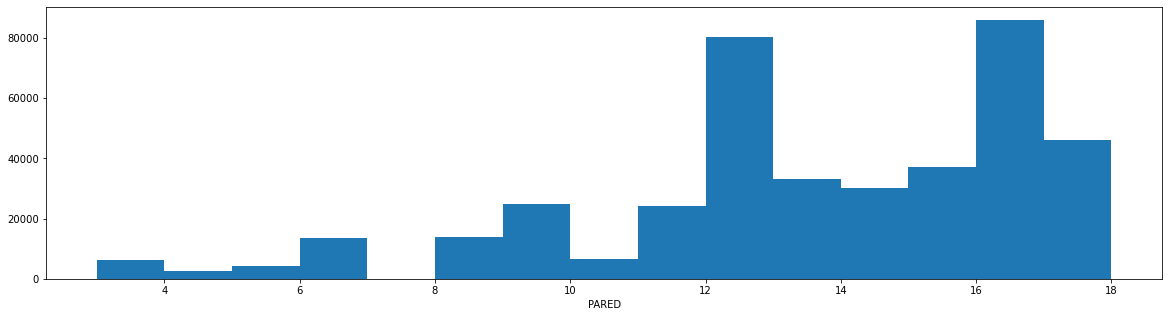

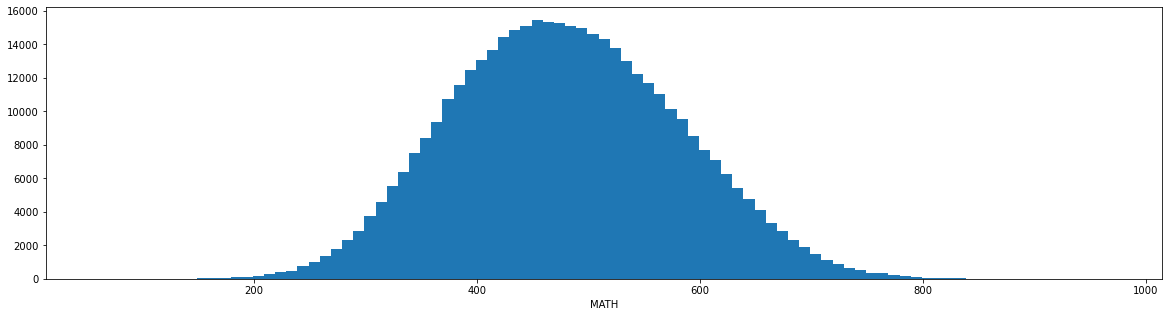

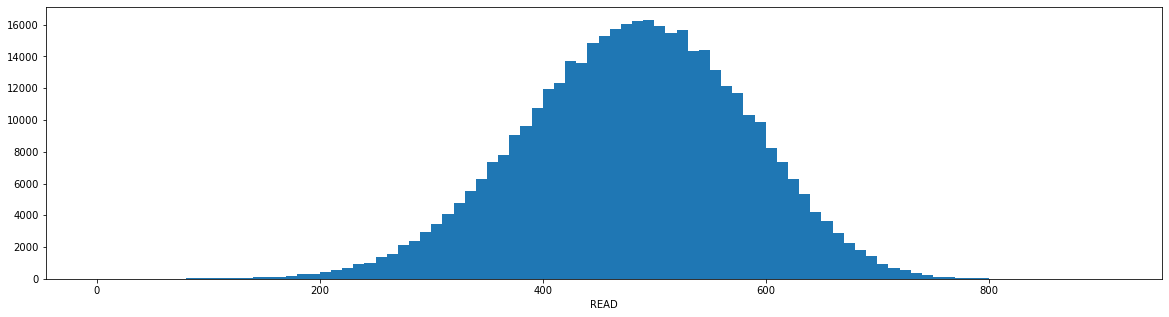

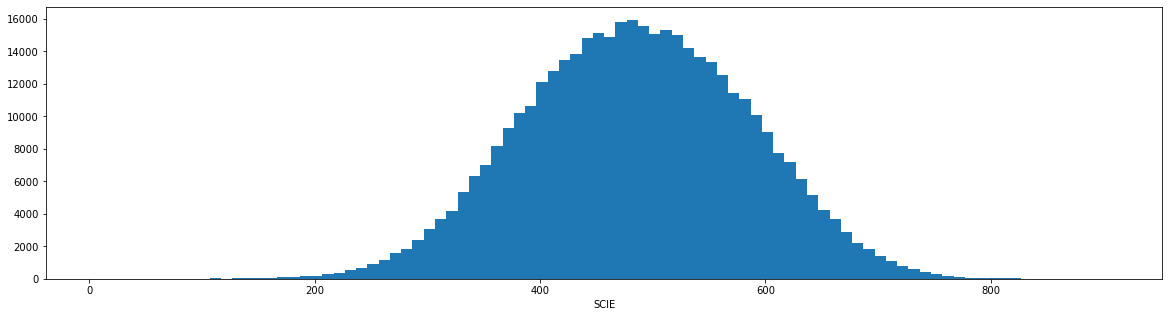

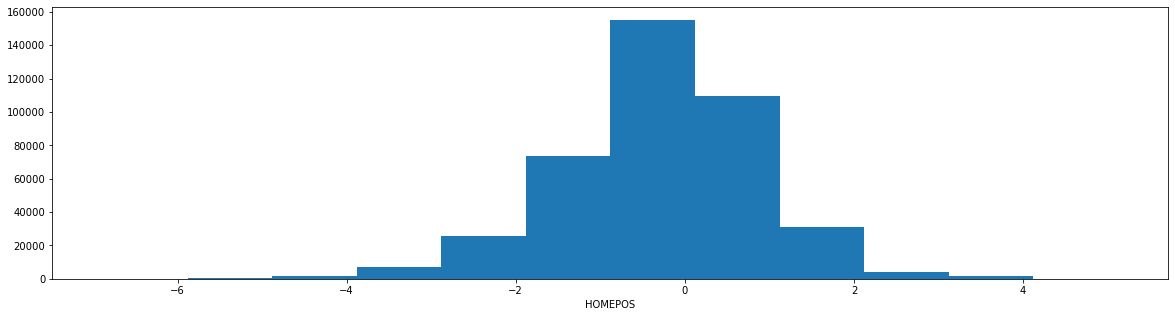

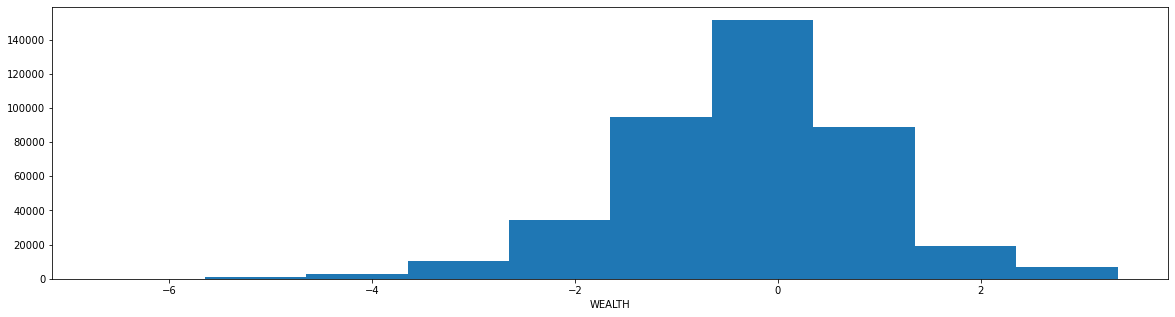

In [18]:
list_num = ['PARED', 'MATH', 'READ', 'SCIE', 'HOMEPOS', 'WEALTH']#'TUT', 'OUTHOURS', 
for i in list_num:
    if df_master[i].max() > 20:
        bin_edges = np.arange(df_master[i].min(), df_master[i].max()+10, 10)
    else:
        bin_edges = np.arange(df_master[i].min(), df_master[i].max()+1, 1)
    sns.distplot(df_master[i], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1})
    plt.rcParams["figure.figsize"] = (20,5)
    plt.show();

The distibution of the numerical variables is left skewed for the parental education ("PARED"). The three field of expertise variables "MATH", "READ" and "SCIE" and the variables for the econimic situation "WEALTH" and "HOMEPOS" have a normal distirbution.

### Categorical variables
In the next step I'm going to take a look at the distribution of the categorical variables

In [19]:
list_cat = ['MOM_HOM', 'DAD_HOM', 'DESK', 'ROOM', 'PLACE', 'CPU', 'SW', 'NET', 'LIT', 'POET', 'TEXT']

In [20]:
def countplot (df,column):
    sns.countplot(df[column], color=base_color);
    # add annotations
    n_points = df.shape[0]
    cat_counts = df[column].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels
    
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count, pct_string, ha = 'center', color = 'black')


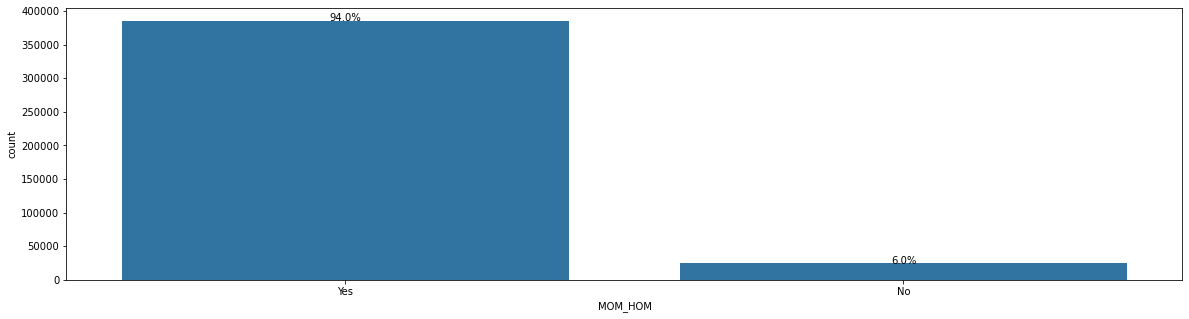

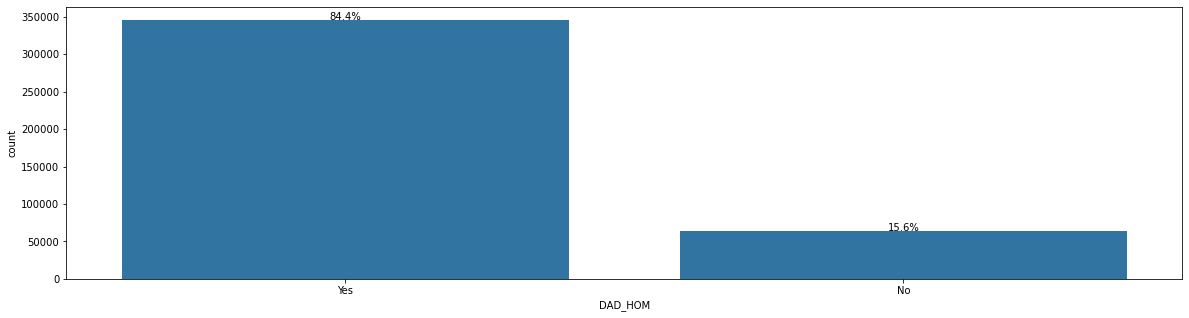

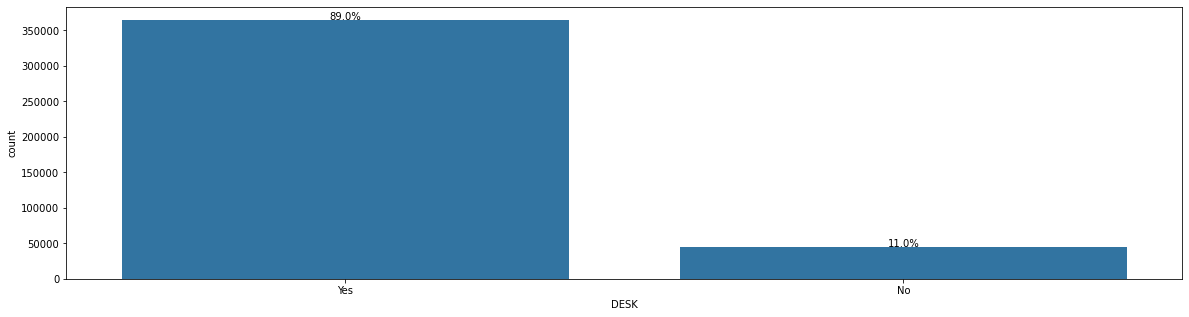

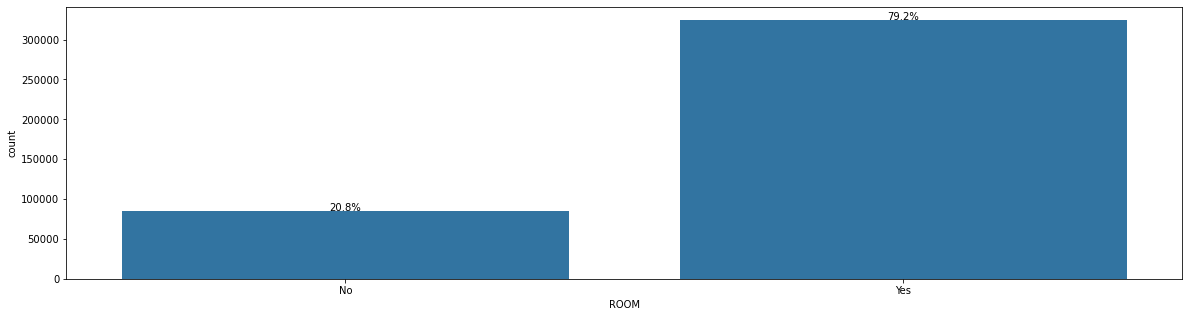

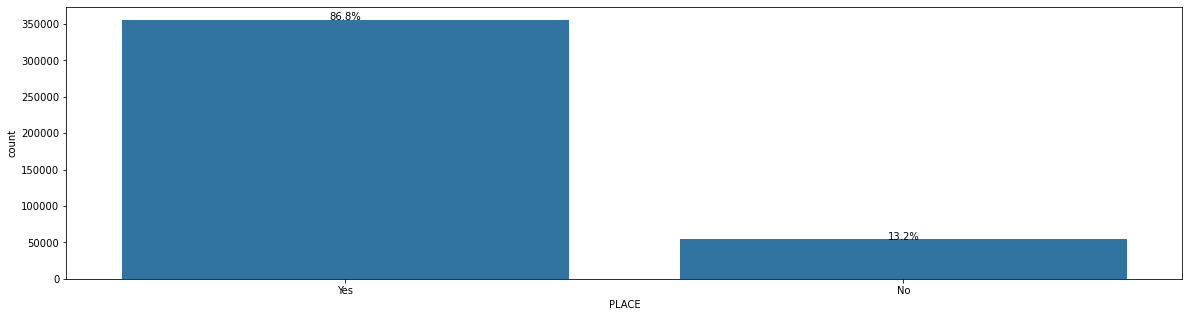

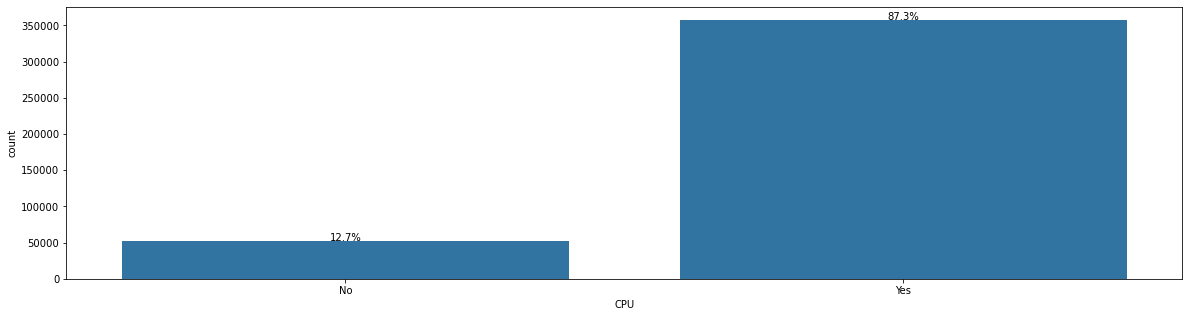

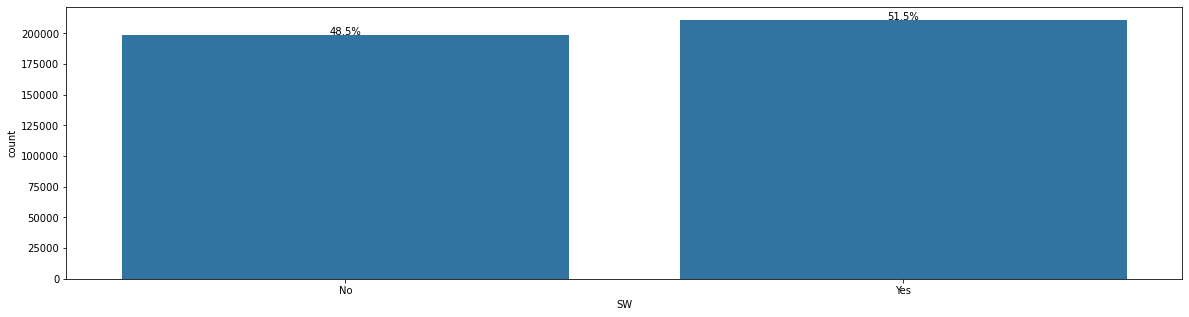

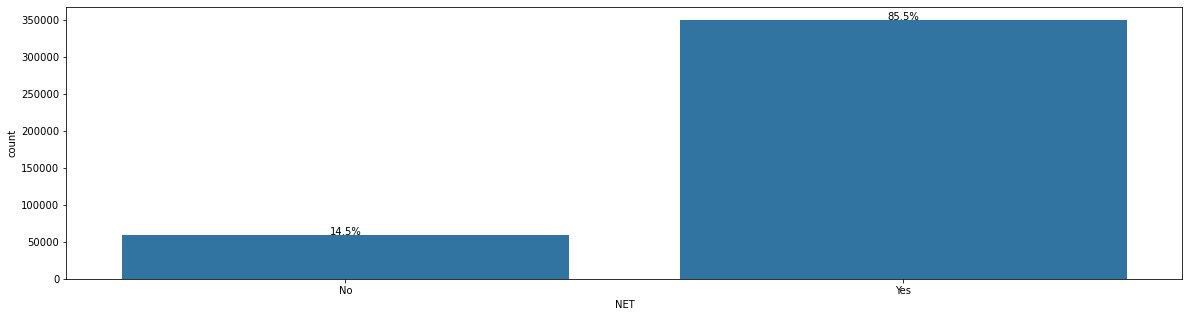

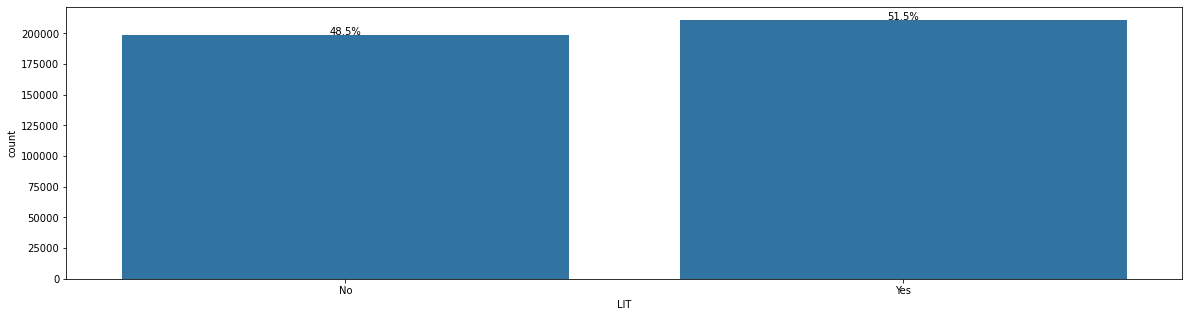

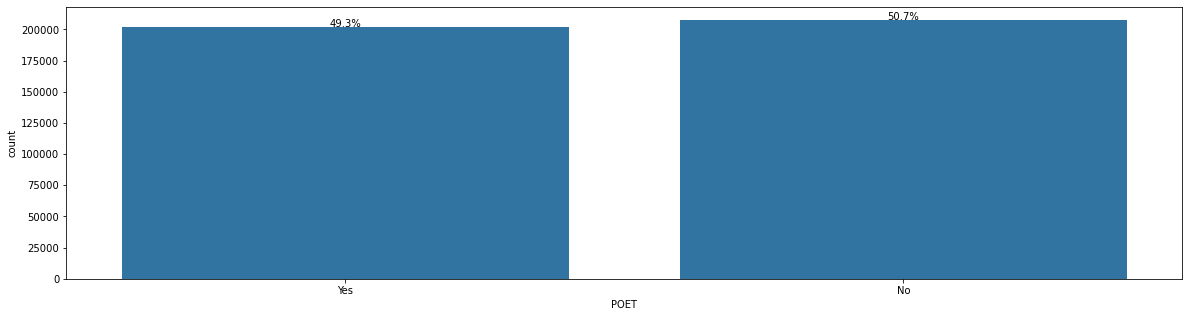

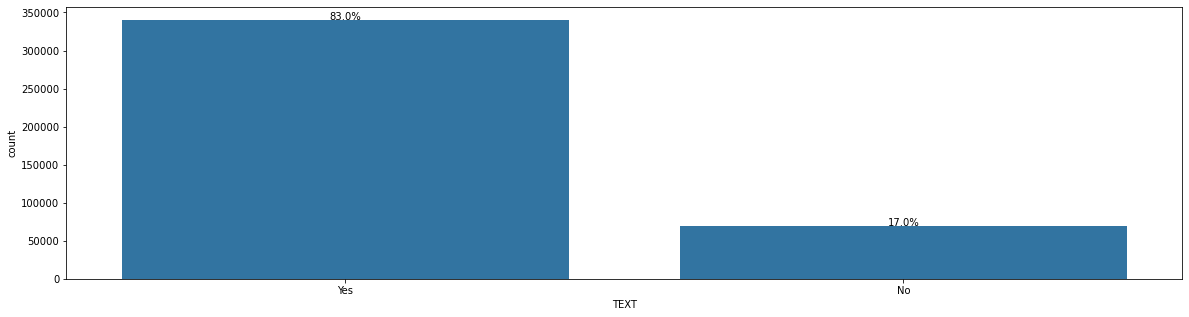

In [21]:
#bar chart for categorical variables
for i in list_cat:
    countplot(df_master,i)
    plt.show();

The distribution of the categorical variables does not show any remarkable abormalities from my point of view. The "SW", "LIT", "POET" are evenly distributed. The distribution of the other columns is as expected.

### Creating new environmental variables
 In this step I'll comprehend the categorical variables to three new variables with the goal to have more categories in the examined column, which will be used for groupby operations below. The names of the new columns and the columns used to create them are stored in dictionary.

In [22]:
list_dict= {
    'dig_learn_infra' : ['CPU', 'NET', 'SW'],
    'learn_infra' : ['PLACE', 'ROOM', 'DESK'],
    'read_learn_infra' : ['LIT', 'POET', 'TEXT']
    }

After that the values in the columns are going to be repalced by the column name

In [23]:
for key, value in list_dict.items():
    for i in value:
        df_master[i].replace('No', '', inplace=True)    
        df_master[i].replace('Yes', i, inplace=True)

In [24]:
# Check
df_master.head()

,COUNTRY,MOM_HOM,DAD_HOM,DESK,ROOM,PLACE,CPU,SW,NET,LIT,POET,TEXT,HOMEPOS,PARED,WEALTH,MATH,READ,SCIE
0,Albania,Yes,Yes,DESK,,PLACE,,,,,POET,TEXT,-2.61,12.0,-2.92,406.8469,249.5762,341.7009
1,Albania,Yes,Yes,DESK,ROOM,PLACE,CPU,SW,NET,LIT,POET,TEXT,1.41,16.0,0.69,486.1427,406.2936,548.9929
2,Albania,Yes,Yes,DESK,ROOM,PLACE,CPU,,NET,LIT,POET,TEXT,0.14,16.0,-0.23,533.2684,401.2100,499.6643
3,Albania,Yes,Yes,DESK,ROOM,PLACE,CPU,SW,NET,LIT,POET,TEXT,-0.73,16.0,-1.17,412.2215,547.3630,438.6796
4,Albania,Yes,Yes,DESK,ROOM,,CPU,SW,NET,LIT,POET,TEXT,-0.57,12.0,-1.17,381.9209,311.7707,361.5628


The first new column is the general infrastructure consisting of a place, room and desk. The strings of the original columns are put together in one column and then seperated by a comma.
#### Gneral learning infrastructure

In [25]:
df_master['learn_infra'] = df_master.PLACE + df_master.ROOM + df_master.DESK

In [26]:
df_master.loc[df_master.learn_infra == 'PLACEROOMDESK', 'learn_infra'] = 'PLACE, ROOM, DESK'
df_master.loc[df_master.learn_infra == 'PLACEDESK', 'learn_infra'] = 'PLACE, DESK'
df_master.loc[df_master.learn_infra == 'ROOMDESK', 'learn_infra'] = 'ROOM, DESK'
df_master.loc[df_master.learn_infra == 'PLACEROOM', 'learn_infra'] = 'PLACE, ROOM'
df_master.loc[df_master.learn_infra == '', 'learn_infra'] = 'NO LEARN INFRA'

#### Digital learning infrastructure
The steps above are repeated for the digitalal learing infrastructure

In [27]:
df_master['dig_learn_infra'] = df_master.NET + df_master.SW + df_master.CPU

In [28]:
df_master.loc[df_master.dig_learn_infra == 'NETSWCPU', 'dig_learn_infra'] = 'NET, SW, CPU'
df_master.loc[df_master.dig_learn_infra == 'NETCPU', 'dig_learn_infra'] = 'NET, CPU'
df_master.loc[df_master.dig_learn_infra == 'SWCPU', 'dig_learn_infra'] = 'SW, CPU'
df_master.loc[df_master.dig_learn_infra == 'NETSW', 'dig_learn_infra'] = 'NET, SW'
df_master.loc[df_master.dig_learn_infra == '', 'dig_learn_infra'] = 'NO DIG LEARN INFRA'

#### Learning infrastructure for reading
Here is the same procedure for the reading learing infrastructure

In [29]:
df_master['read_learn_infra'] = df_master.LIT + df_master.POET + df_master.TEXT

In [30]:
df_master.loc[df_master.read_learn_infra == 'LITPOETTEXT', 'read_learn_infra'] = 'LIT, POET, TEXT'
df_master.loc[df_master.read_learn_infra == 'POETTEXT', 'read_learn_infra'] = 'POET, TEXT'
df_master.loc[df_master.read_learn_infra == 'LITPOET', 'read_learn_infra'] = 'LIT, POET'
df_master.loc[df_master.read_learn_infra == 'LITTEXT', 'read_learn_infra'] = 'LIT, TEXT'
df_master.loc[df_master.read_learn_infra == '', 'read_learn_infra'] = 'NO READ LEARN INFRA'

Save the master to a csv file

In [31]:
df_master.to_csv('pisa2012new.csv')

#### Visualisations for learning infrastructures

In the following step the distribution for the new columns is examined

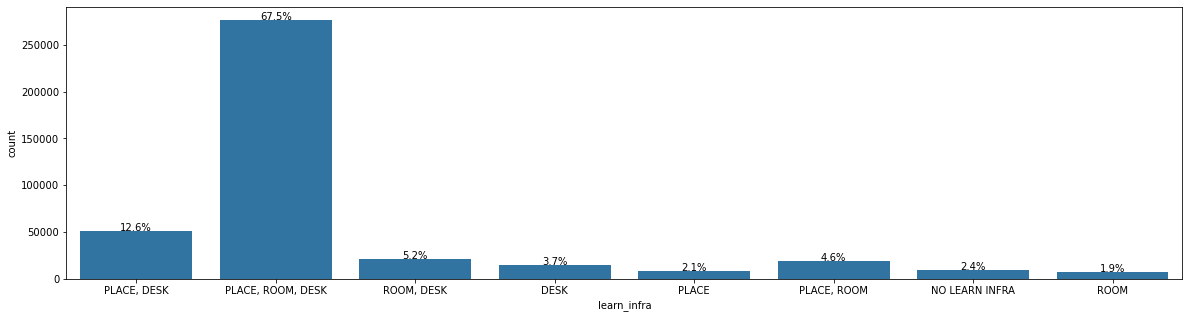

In [32]:
countplot(df_master, 'learn_infra')

67.5% of the students are equiped with a own room, place and desk. Just 2.4% have no place, room and no desk.

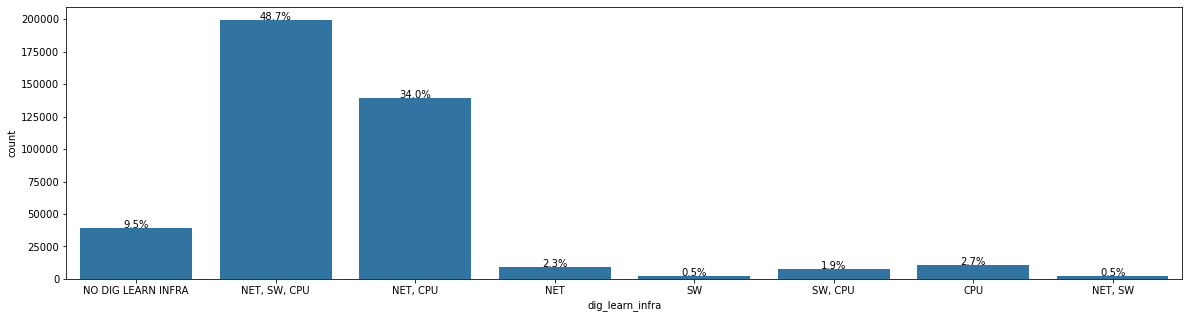

In [33]:
countplot(df_master, 'dig_learn_infra')

Almost half of the students have a computer, software and internet followed by those with a computer and internet with 34%. But also almost ten percent have no digital infrastructure at all.

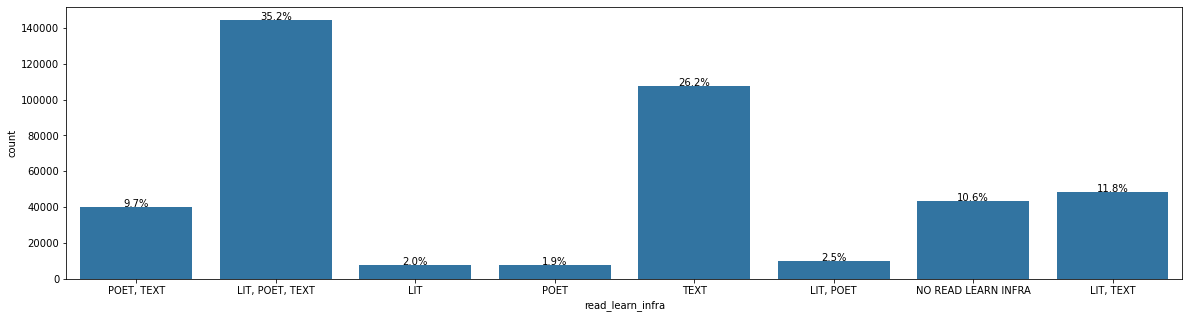

In [34]:
countplot(df_master, 'read_learn_infra')

### Summary

I transformed the original dataframe by reducing the columns and dropping the na values. I also renamed the columns I want to work with to give them speaking names.
Regarding the features, the infrastructural and environmental variables, I've created three new columns dig_learn_infra, read_learn_infra and learn_infra. I did this to compare the distributions in a comprehensive way, that reflects the real situations of the students, who f.e. might have a computer and acces to the internet. In the section of the bivariate exploration the relation of digital and read learning infrastructure will be investigated.
Regarding the reading learn infrastructure the values are more distributed. The top value is 35,2% for those who have all three kinds of books/literature. After this top value is just having a textbook with 26,2%. 10% have no books at all. I'll exmine the relation of the digital and reading learning infratructures to the general one later.

## Bivariate Exploration


### Relation of dig and read learn infra variables to learn infra illustrated by countplots
After lookin at the countplot for each new infrastructure, the last two countplots (dig_learn_infra, read_learn_infra) will be refined by the general learn infrastructure (learn_infra).

In [35]:
def hue_countplt(df, column1, column2):
    plt.title(column1 + ' and ' + column2)
    sns.countplot(data = df, x = column1, hue = column2);
    n_points = df.shape[0]
    cat_counts = df[column1].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count, pct_string, ha = 'center', va='bottom', color = 'black')


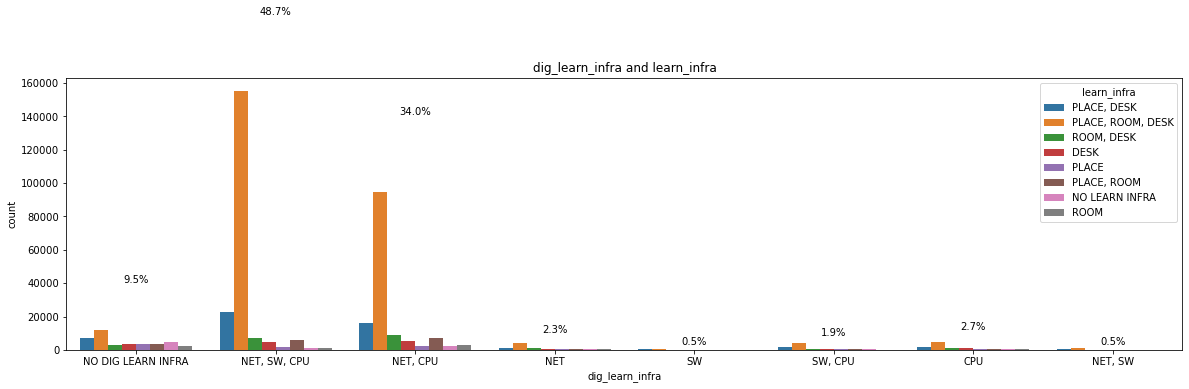

In [36]:
hue_countplt(df_master, 'dig_learn_infra', 'learn_infra')

In this plot it can be clearly seen that the number of those students with all digital and general equipment are represented by the biggest bar with more than 150.000. After that follows the category with Internet and computer. 

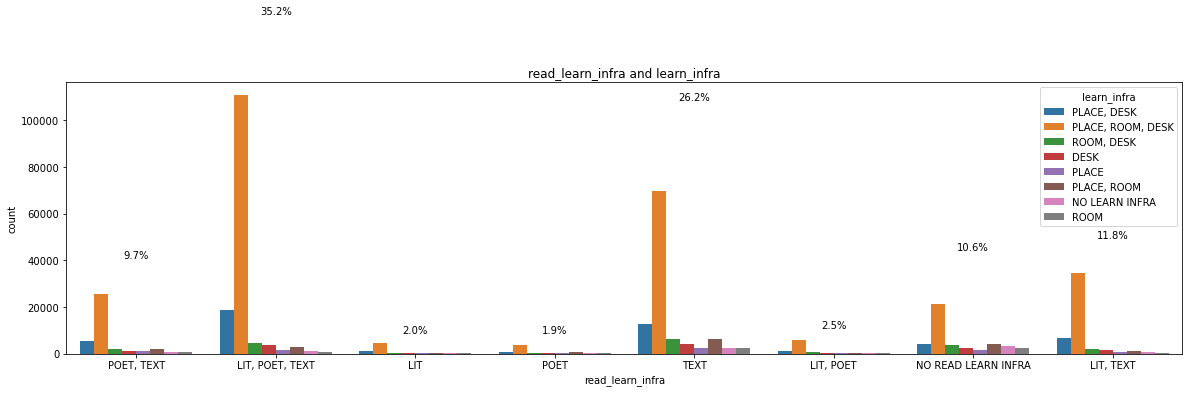

In [37]:
hue_countplt(df_master,'read_learn_infra', 'learn_infra');

As I wrote above the values for the reading learning infrastructure are more distributed than the others.

### Violinplots for the relation learnenvironmental variables with field of expertise

After showing the connection between general and dig and read lerning infratructure, I will illustrate how they relate to the performance in the different fields of expertise. The illustratons are violin and boxplot charts.

learn_infra


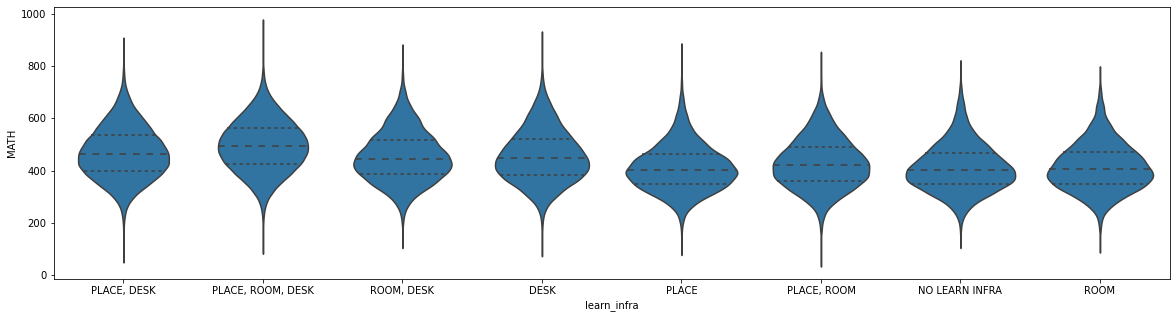

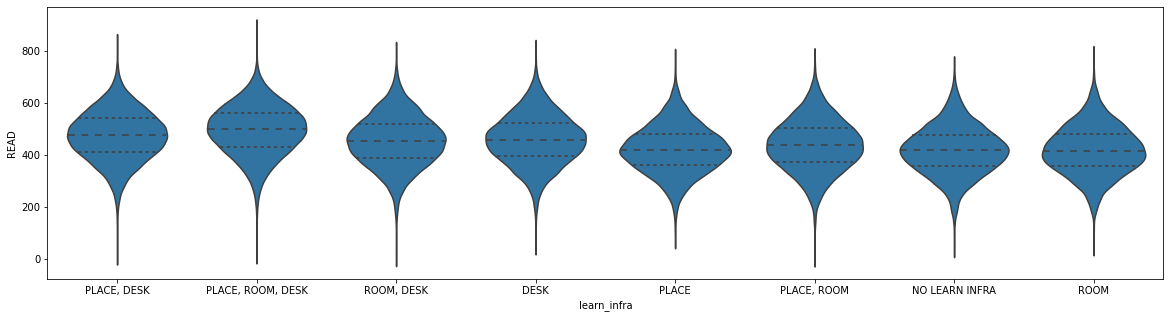

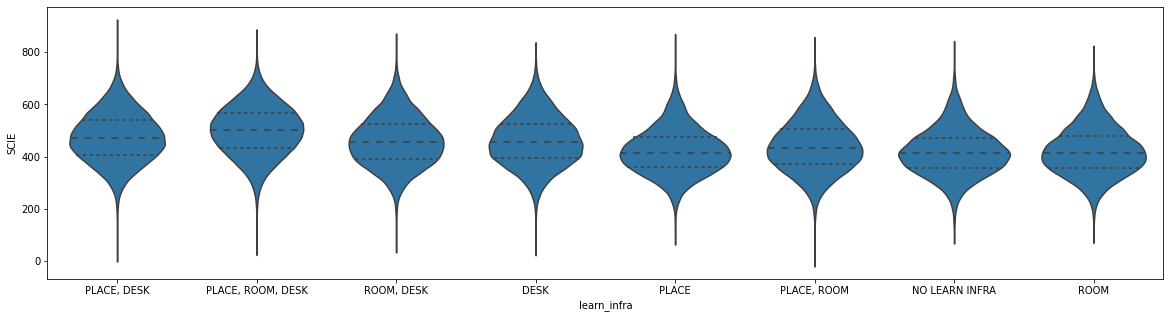

read_learn_infra


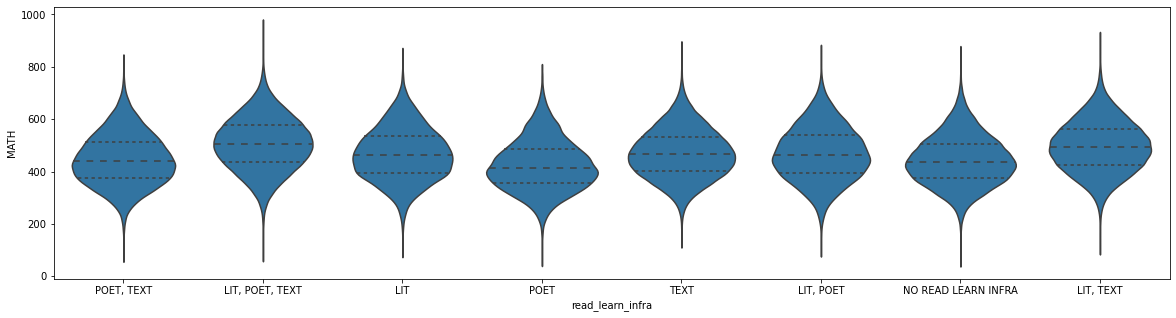

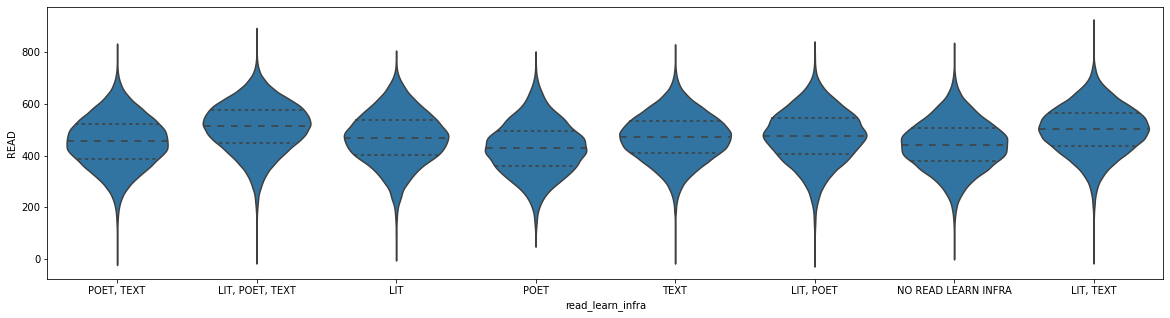

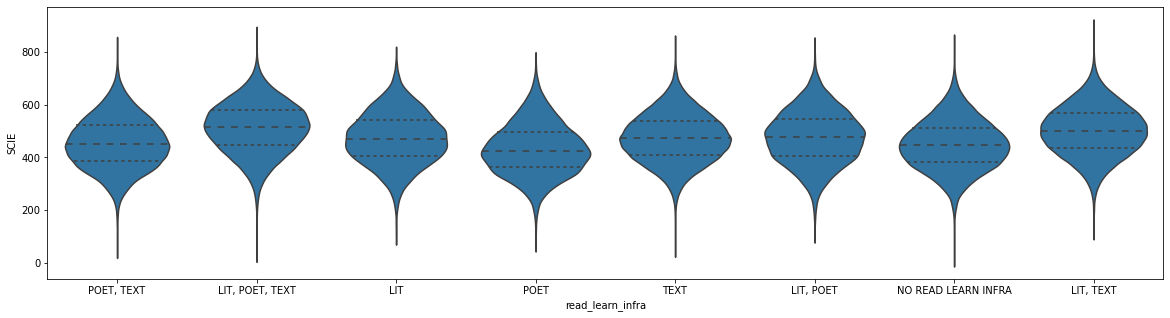

dig_learn_infra


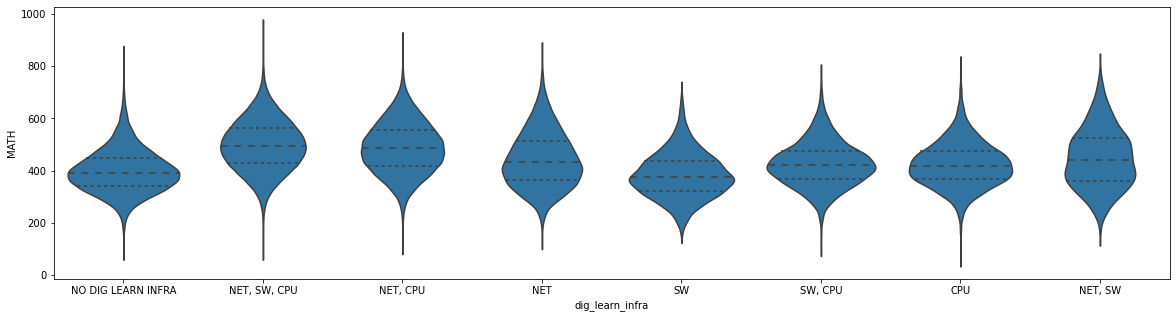

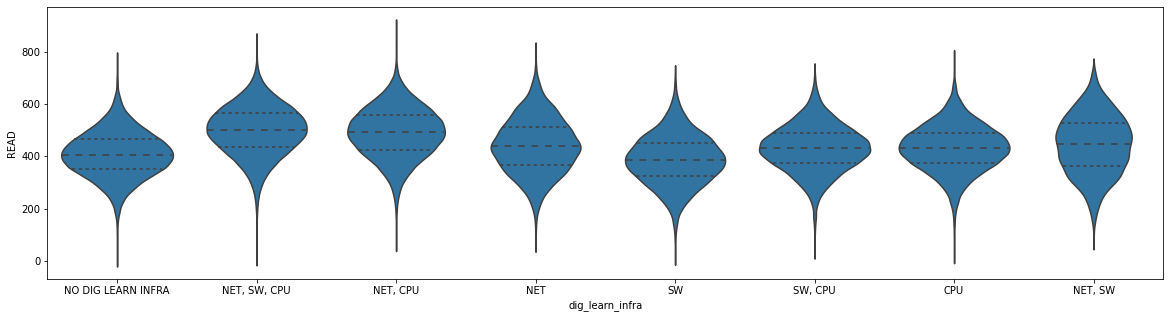

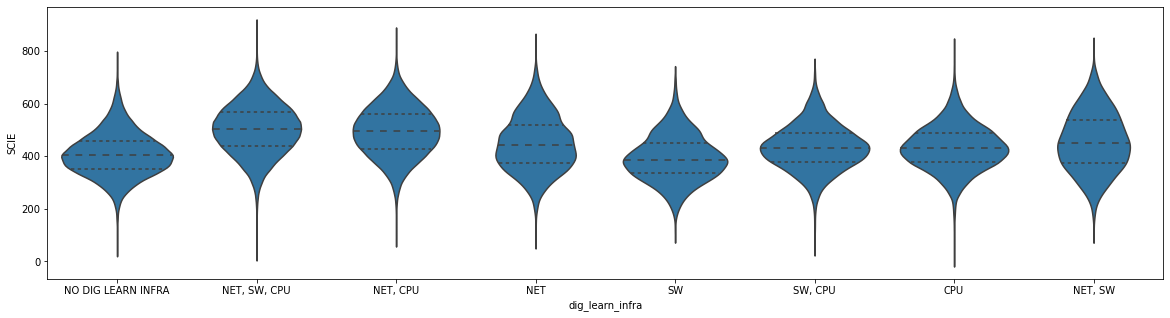

In [38]:
list_infra =['learn_infra', 'read_learn_infra', 'dig_learn_infra']
list_foe = ['MATH', 'READ', 'SCIE']
for i in list_infra:
    print(i)
    for j in list_foe:
        sns.violinplot(data = df_master, x = i, y = j, color = base_color, inner = 'quartile')
        plt.show();

In general the combination of all three attributes seems to be a positive influence for the performance. PLACE&DESK, LIT&TEXT and NET&CPU are following.

### Boxplots for the relation learn-environmental variables with numerical environmetal variables

learn_infra


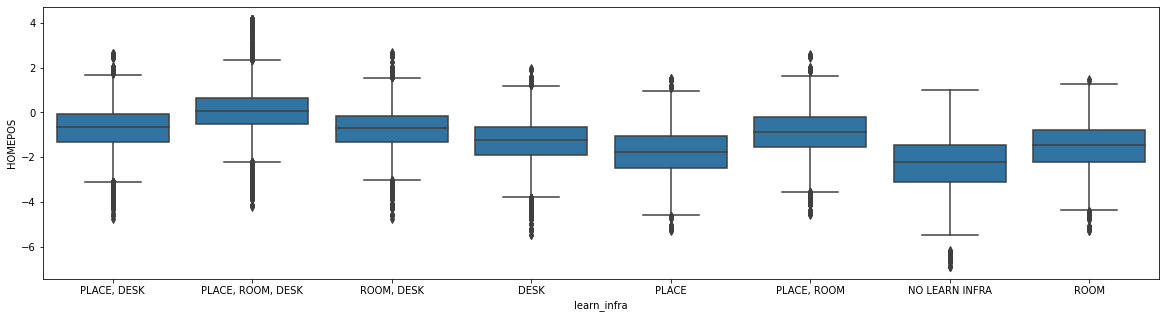

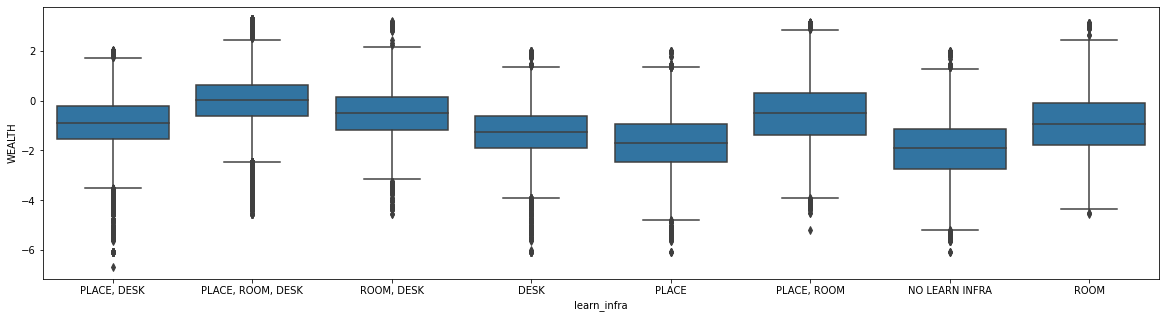

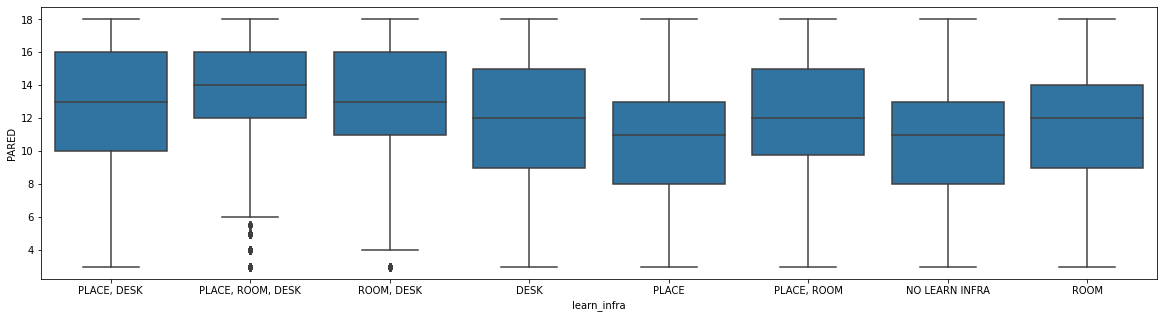

read_learn_infra


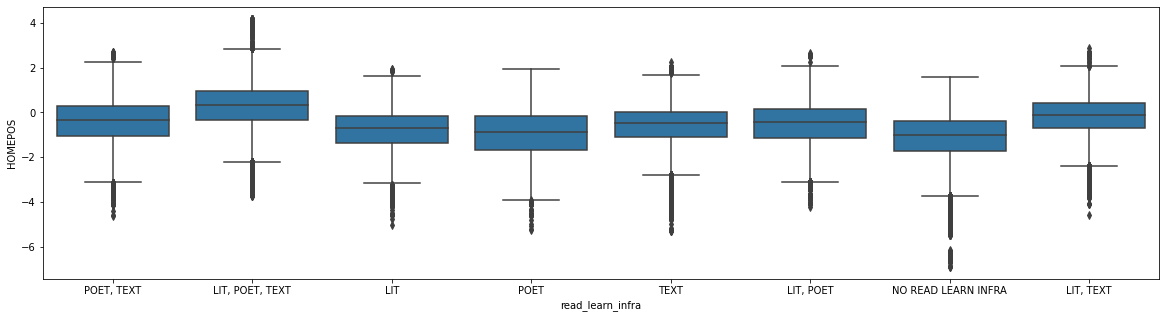

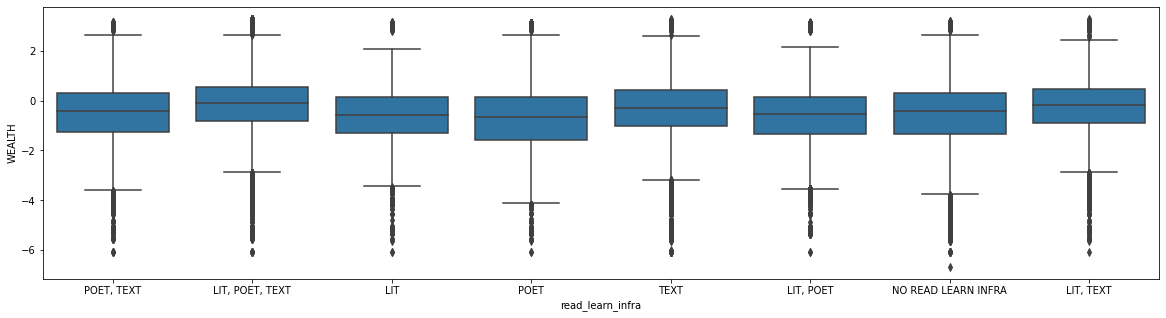

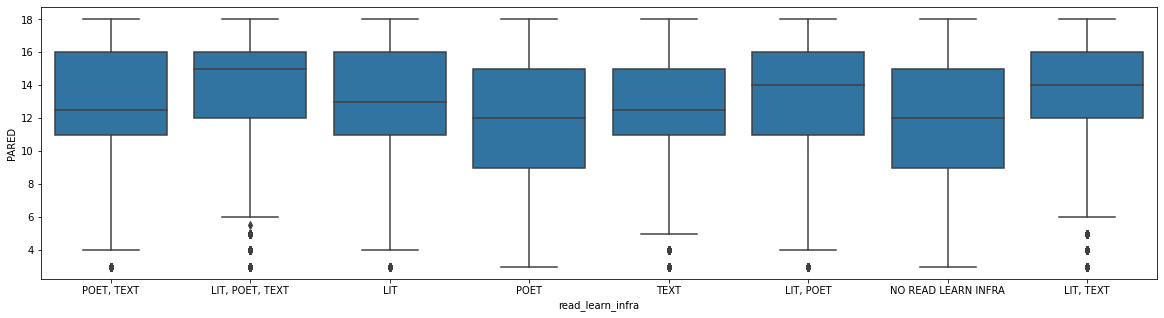

dig_learn_infra


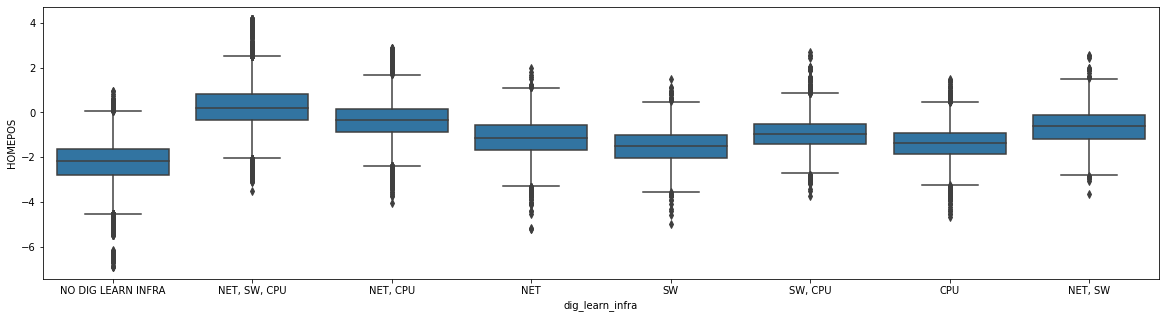

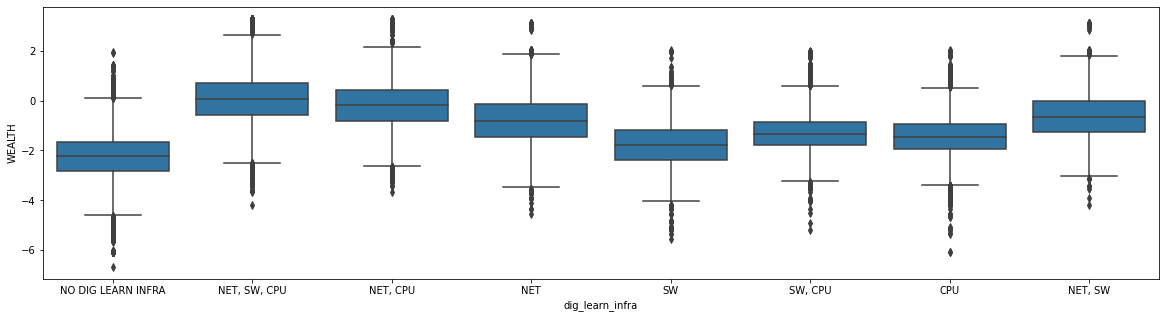

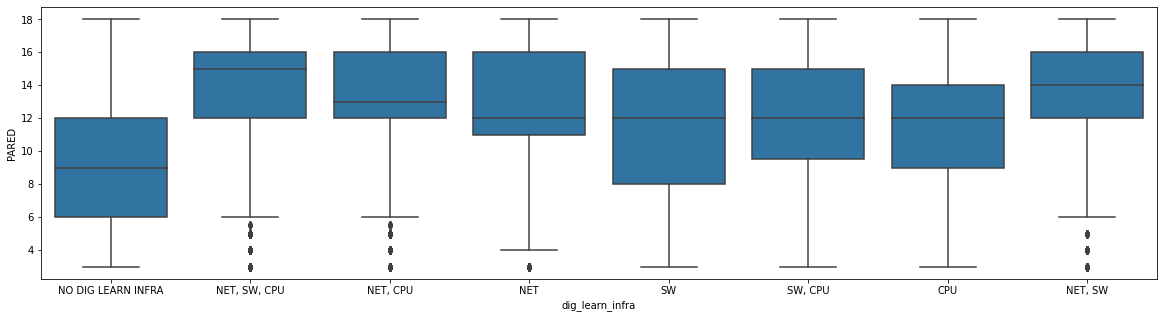

In [39]:
list_env_num = ['HOMEPOS','WEALTH','PARED']
for i in list_infra:
    print(i)
    for j in list_env_num:
            sns.boxplot(data = df_master, x = i, y = j, color = base_color)
            plt.show();

As stated for the violinplots the combination of all variables usually has the highest values (top value, mean) on the y axis. The complete dig_learn_infra shows high values on these numerical variables. The HOMEPOS variable also shows clearer results, the complete combinations are stronger correlated with HOMEPOS.

### Correlations of df_master

Now I want to calculate the correlations between all numerical columns in df_master.

In [40]:
def cor(df):
    return plt.show(sns.heatmap(df.corr(), annot = True));

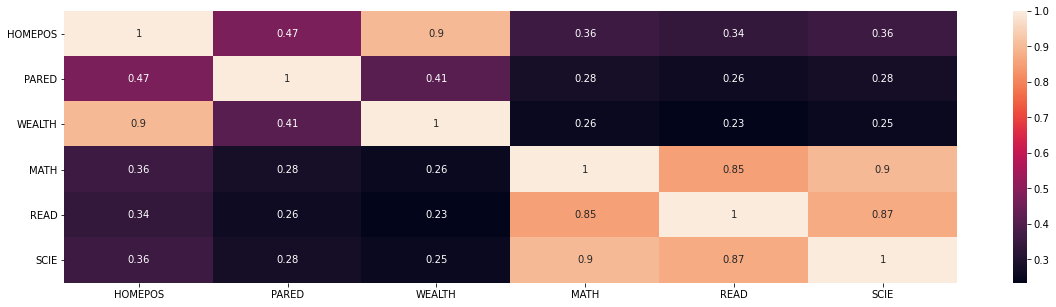

In [41]:
cor(df_master)

Ther are high correlations between HOMEPOS and WEALTH, and also all three fields of expertise "MATH", "READ" and "SCIE" are strong correlated. "HOMEPOS" has a stronger correlation to the fields of expertise than "WEALTH" and "PARED". In the next step I'm going to visualize a strong and a weak correlation.

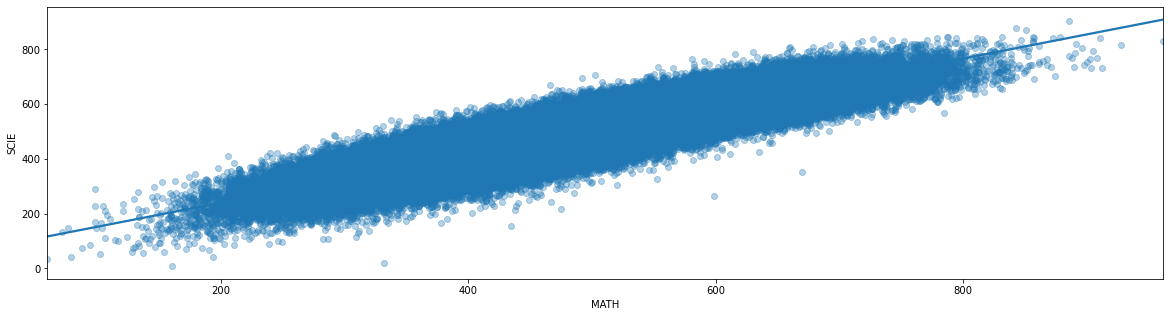

In [42]:
sns.regplot(x=df_master['MATH'], y=df_master['SCIE'], scatter_kws = {'alpha' : 1/3});

A cloud of dots can be seen and the dots aare just visible on the edge of the cloud. The regression line crosses the middle of the cloud. The cloud has a very slim, elliptical figure.

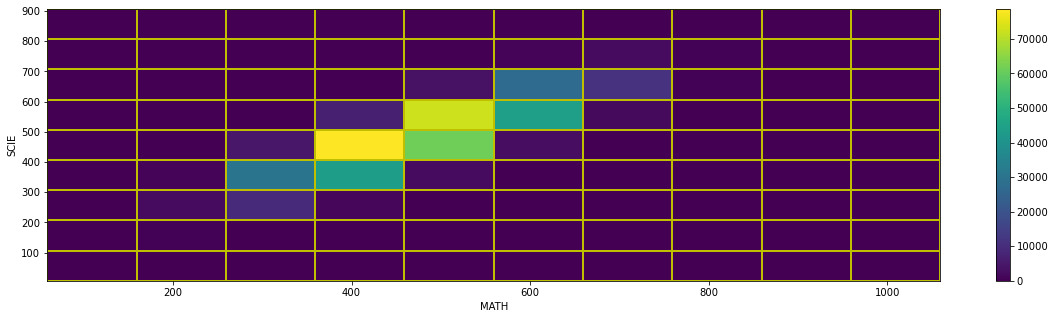

In [43]:
bins_x = np.arange(df_master['MATH'].min(), df_master['MATH'].max()+100, 100)
bins_y = np.arange(df_master['SCIE'].min(), df_master['SCIE'].max()+100, 100)
plt.hist2d(data = df, x=df_master['MATH'], y=df_master['SCIE'],bins = [bins_x, bins_y],color = 'y')
plt.xlabel('MATH')
plt.ylabel('SCIE')
plt.colorbar();

The heatmap visualizes the strong correlation with colors. In the middle of the cloud the colors are brighter due to a higher numer of dots.

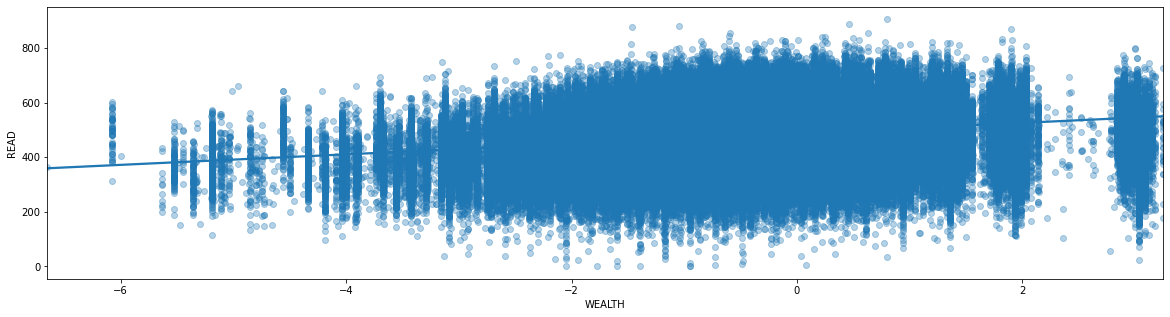

In [44]:
sns.regplot(x=df_master['WEALTH'], y=df_master['READ'], scatter_kws = {'alpha' : 1/3});

This is the example for a weeker correlation, the weakest in our dataframe. The cloud is not so slim anymore and there are more dots that can be seen. The paart of the cloud, wher no dots can be seen is smaller than in the strong correlation.

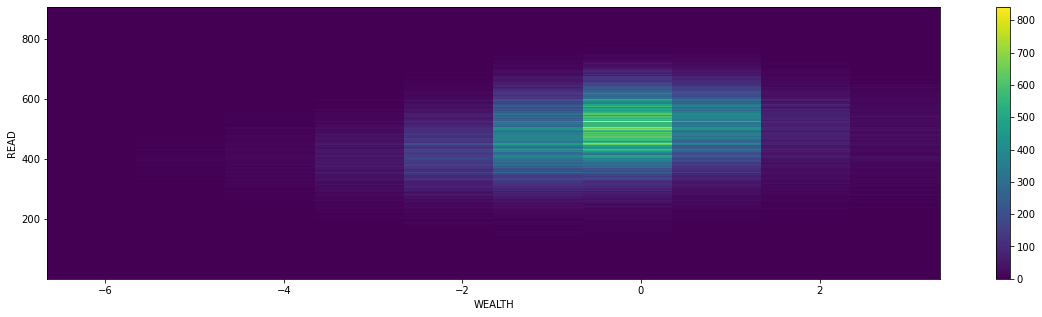

In [45]:
bins_x = np.arange(df_master['WEALTH'].min(), df_master['WEALTH'].max()+1, 1)
bins_y = np.arange(df_master['READ'].min(), df_master['READ'].max()+1, 1)
plt.hist2d(data = df, x=df_master['WEALTH'], y=df_master['READ'], bins = [bins_x, bins_y])
plt.xlabel('WEALTH')
plt.ylabel('READ')
plt.colorbar();

Analogous the colors in the heatmap are not so bright and there are dark stripes crossing them.

### Grouping by learning infrastructures

In [46]:
READ_gb = df_master.groupby('read_learn_infra').mean()
DIG_gb = df_master.groupby('dig_learn_infra').mean()
GEN_gb = df_master.groupby('learn_infra').mean()
list_infra_gb = [READ_gb,DIG_gb,GEN_gb]

Barcharts of learning infrastructures regarding each field of expertise variable

read_learn_infra
LIT                    466.837666
LIT, POET              468.490849
LIT, POET, TEXT        506.257112
LIT, TEXT              495.878442
NO READ LEARN INFRA    443.827667
POET                   424.720120
POET, TEXT             446.730154
TEXT                   469.204684
Name: MATH, dtype: float64


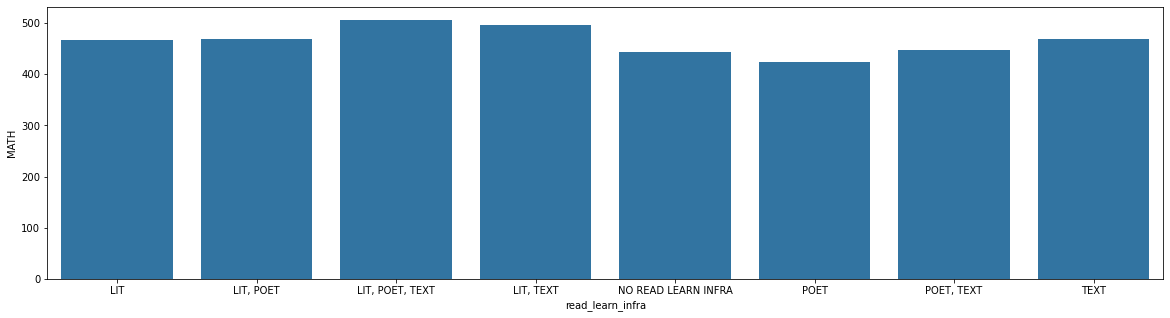

read_learn_infra
LIT                    467.764059
LIT, POET              473.340778
LIT, POET, TEXT        508.973702
LIT, TEXT              498.617012
NO READ LEARN INFRA    441.023065
POET                   428.665444
POET, TEXT             453.030792
TEXT                   469.763514
Name: READ, dtype: float64


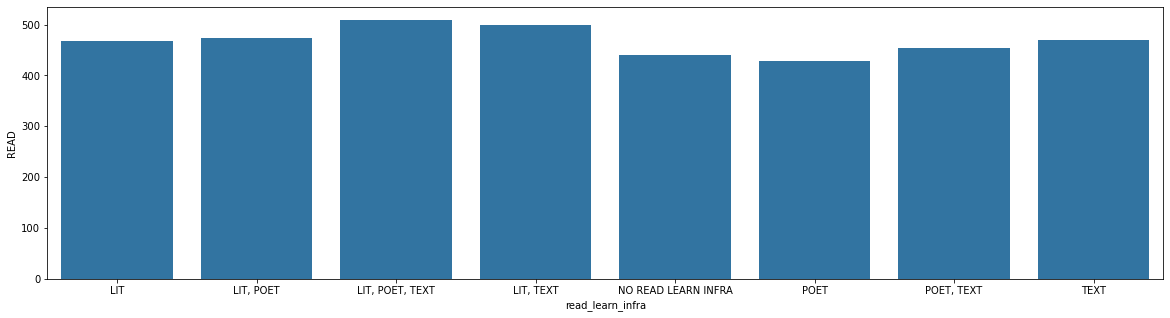

read_learn_infra
LIT                    472.759684
LIT, POET              476.389515
LIT, POET, TEXT        512.131027
LIT, TEXT              501.617881
NO READ LEARN INFRA    448.379994
POET                   431.497240
POET, TEXT             455.017075
TEXT                   474.113724
Name: SCIE, dtype: float64


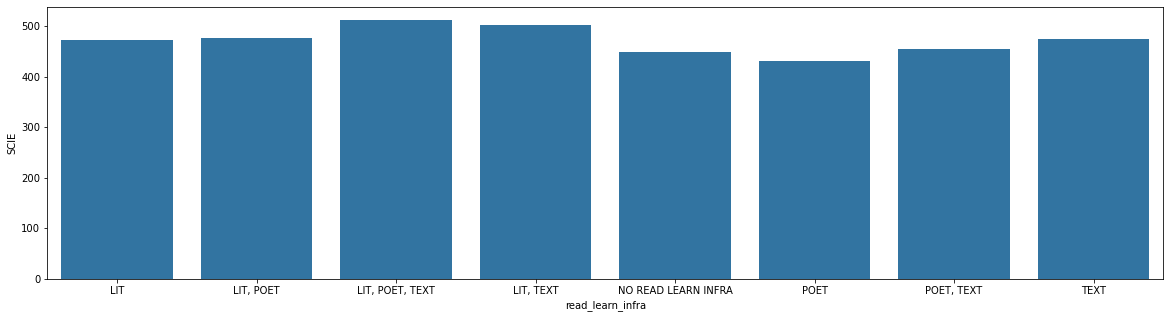

dig_learn_infra
CPU                   424.182311
NET                   442.845078
NET, CPU              488.708502
NET, SW               447.683587
NET, SW, CPU          497.094123
NO DIG LEARN INFRA    399.061264
SW                    383.431190
SW, CPU               425.741616
Name: MATH, dtype: float64


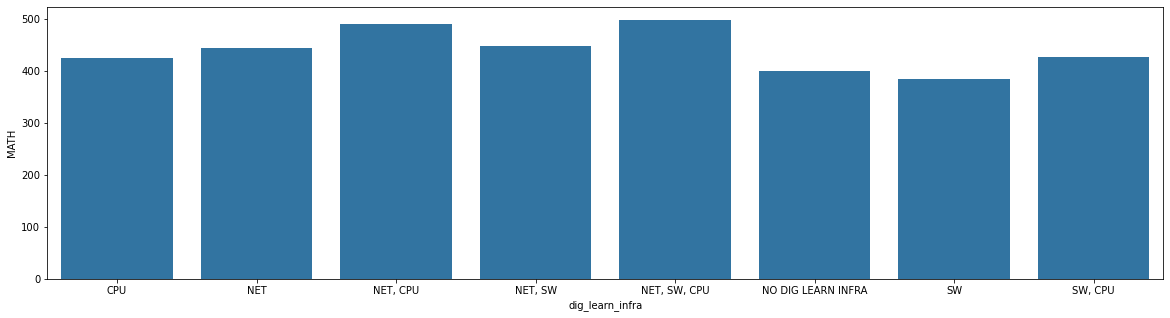

dig_learn_infra
CPU                   431.818613
NET                   440.083501
NET, CPU              490.064634
NET, SW               444.845752
NET, SW, CPU          498.018138
NO DIG LEARN INFRA    407.585393
SW                    387.427553
SW, CPU               430.314596
Name: READ, dtype: float64


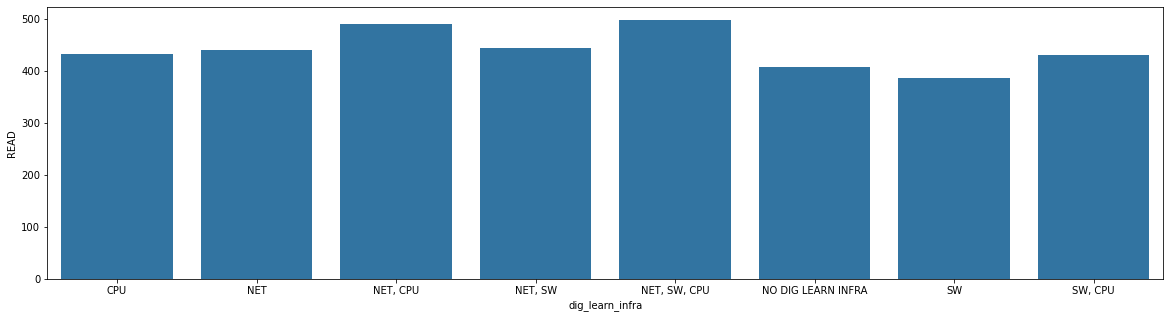

dig_learn_infra
CPU                   433.287563
NET                   448.103613
NET, CPU              494.415068
NET, SW               455.012921
NET, SW, CPU          501.935558
NO DIG LEARN INFRA    408.284029
SW                    393.370186
SW, CPU               433.526322
Name: SCIE, dtype: float64


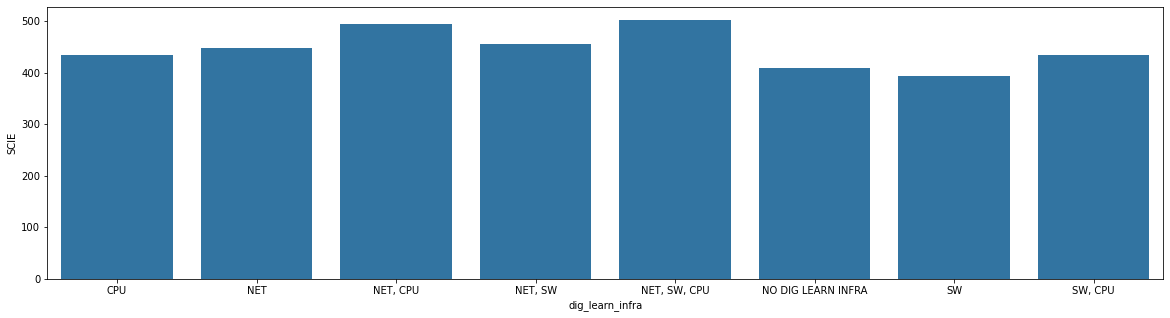

learn_infra
DESK                 456.447771
NO LEARN INFRA       412.266771
PLACE                411.410042
PLACE, DESK          468.566559
PLACE, ROOM          428.380975
PLACE, ROOM, DESK    494.787020
ROOM                 413.926853
ROOM, DESK           453.909674
Name: MATH, dtype: float64


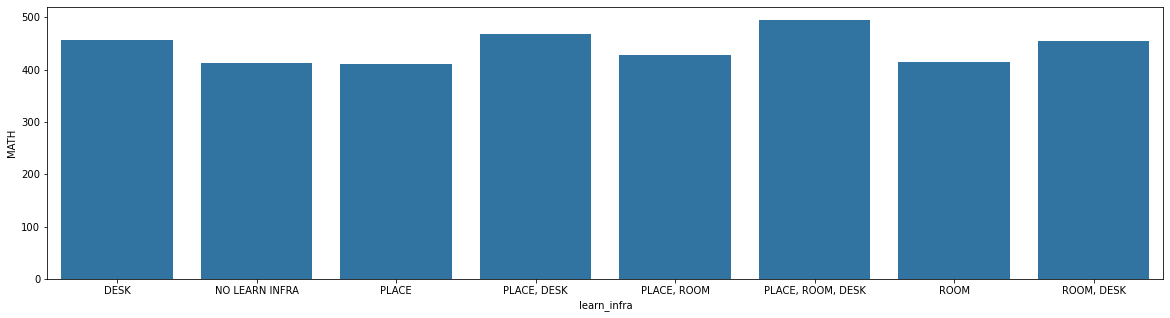

learn_infra
DESK                 459.522274
NO LEARN INFRA       418.413517
PLACE                422.496984
PLACE, DESK          474.264549
PLACE, ROOM          438.402864
PLACE, ROOM, DESK    494.986338
ROOM                 419.349711
ROOM, DESK           454.819722
Name: READ, dtype: float64


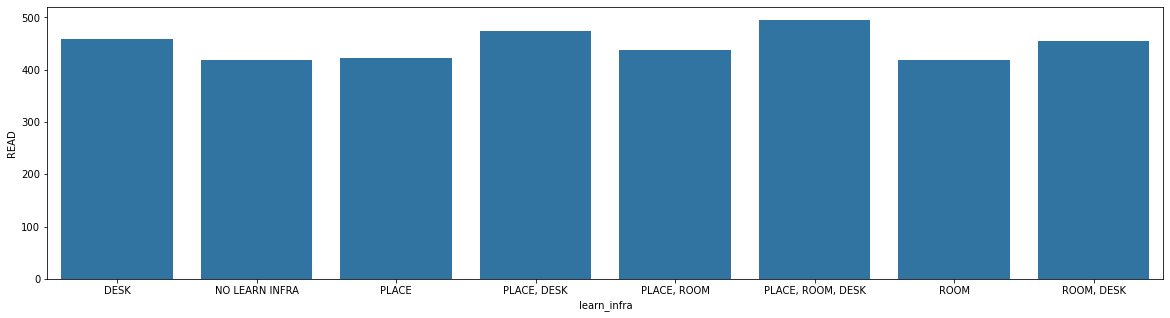

learn_infra
DESK                 461.244952
NO LEARN INFRA       417.782240
PLACE                421.411009
PLACE, DESK          474.303077
PLACE, ROOM          439.901856
PLACE, ROOM, DESK    500.017965
ROOM                 421.454183
ROOM, DESK           460.089527
Name: SCIE, dtype: float64


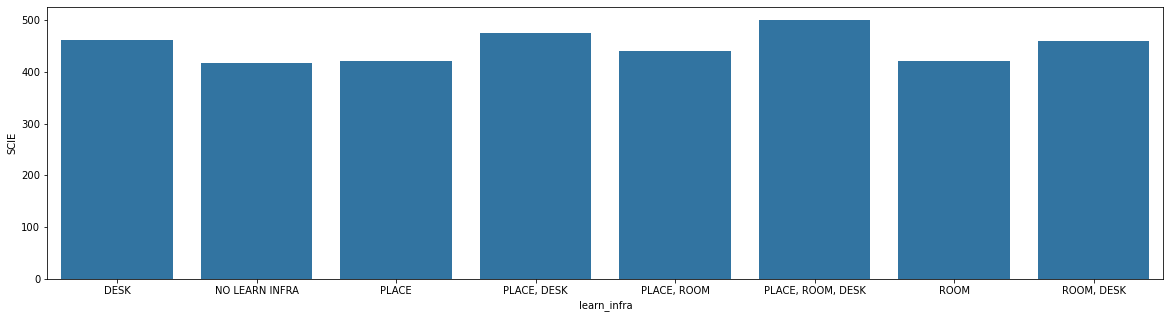

In [47]:
for i in list_infra_gb:
    for j in list_foe:
        print(i[j])
        sns.barplot(x=i.index,y=j, data=i, color=base_color)
        plt.show();

When you compare the performance of the group with complete learning infrastructure and those without anything the difference is at least 60 scores.

### Top ten and lowest ten countries regarding fields of expertise and the distribution of learning infrastructures

In this section the performance score of the fields of expertise are going to be investigated deeper by comparing the top and lowest ten countries. I'm using dictionaries to transform and store the data.

In [48]:
#groupby country and selecting top and lowest ten 
count_gb = df_master.groupby('COUNTRY').mean()
dict_count_gb = {}
for i in list_foe:
    count_gb = count_gb.sort_values(i, axis=0, ascending=False)
    x = 'top_ten_' + i
    y = 'low_ten_' + i
    dict_count_gb[x] = count_gb.head(10)
    dict_count_gb[y] = count_gb.tail(10)

In [49]:
# dictionary to store the df-master data filtered by the top/low ten
dict_master_gb = {}
for key, value in dict_count_gb.items():
    x = value.index
    y = key + '_master'
    dict_master_gb[y] =df_master[df_master.COUNTRY.isin(x)]
    

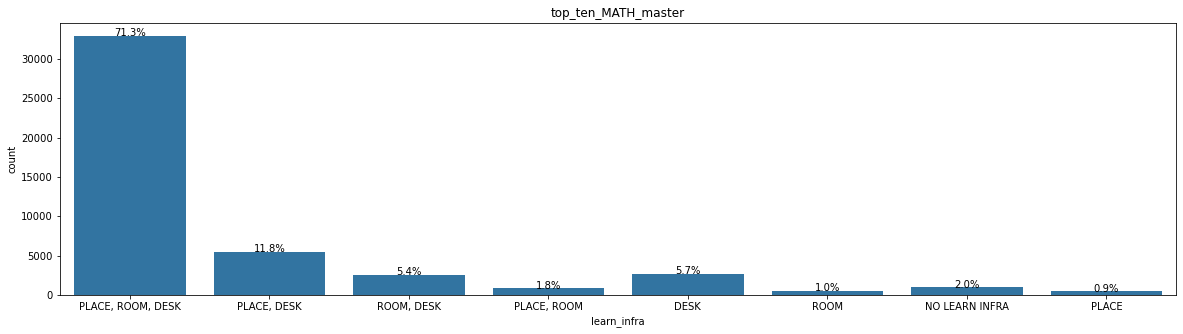

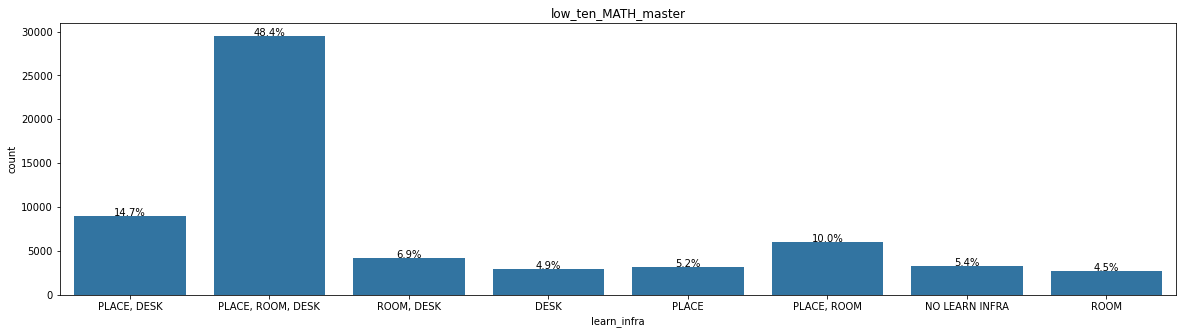

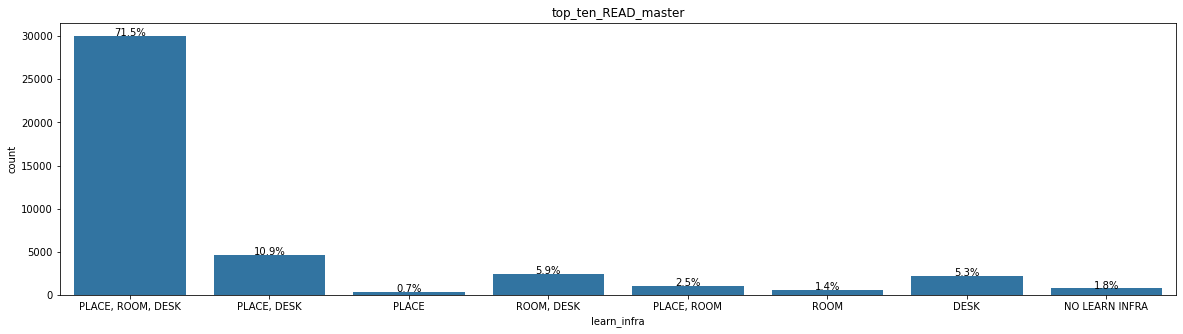

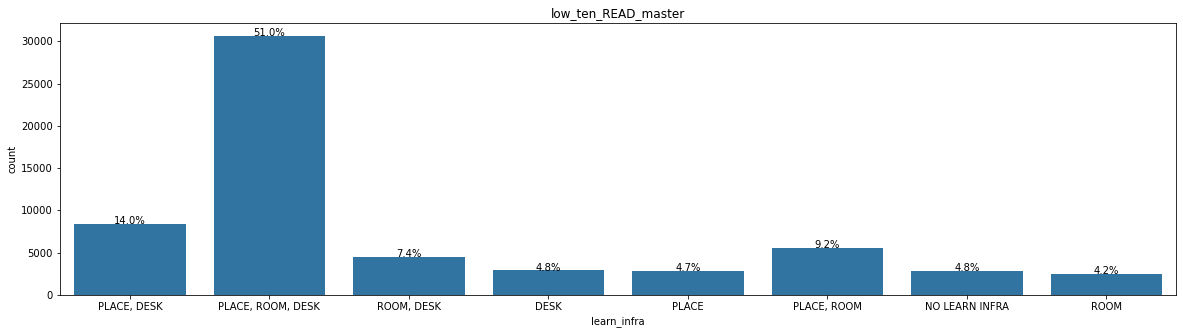

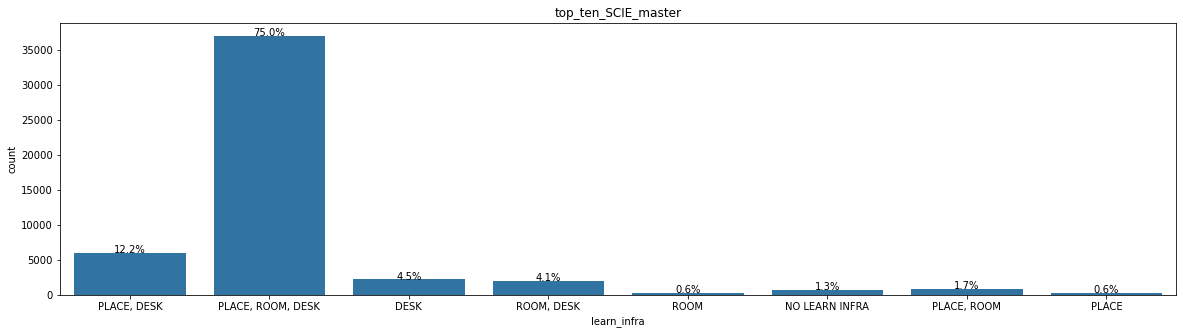

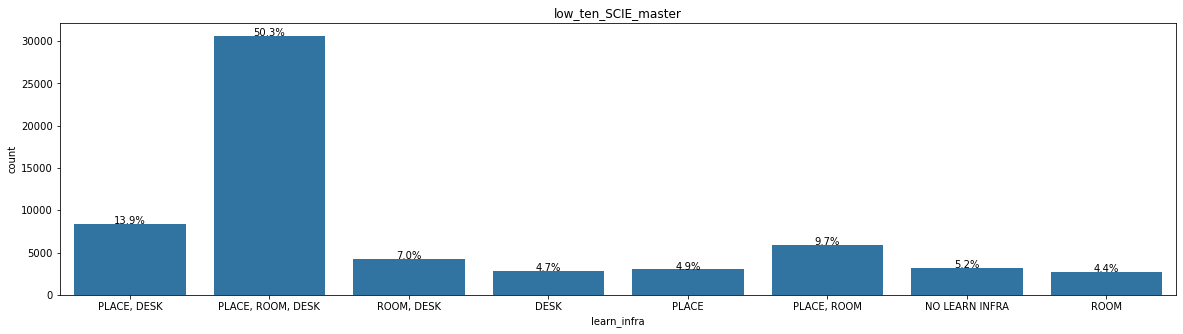

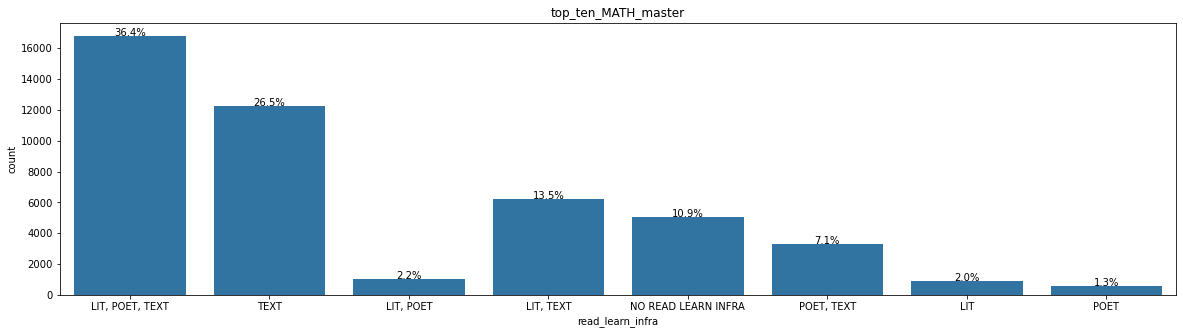

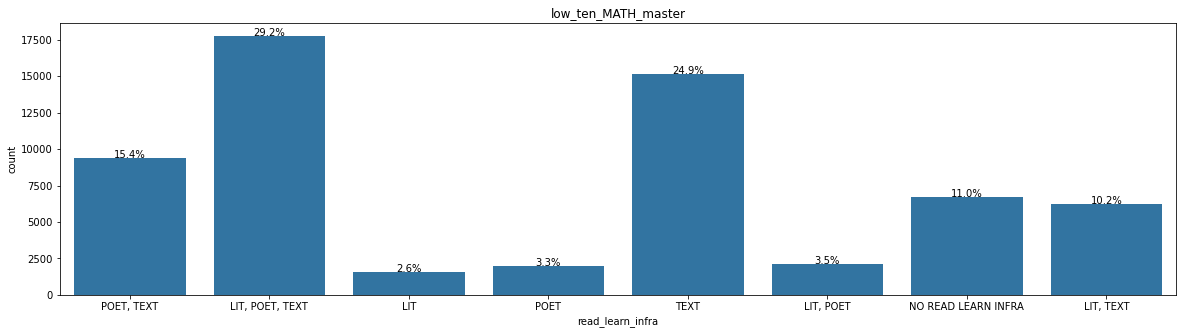

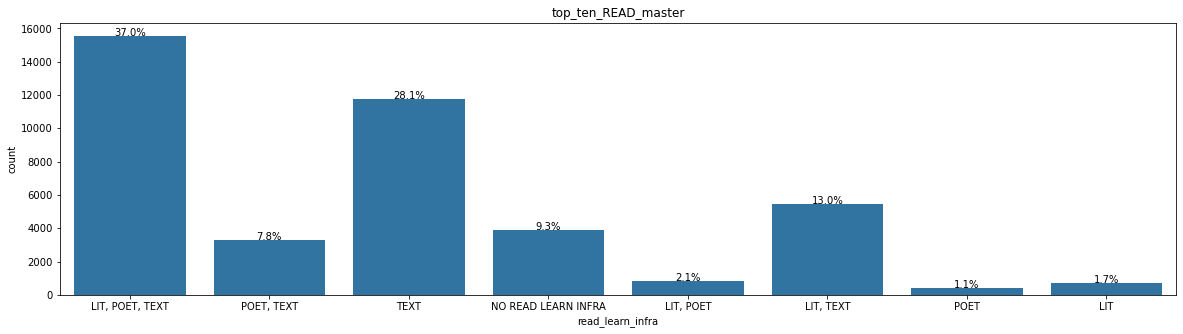

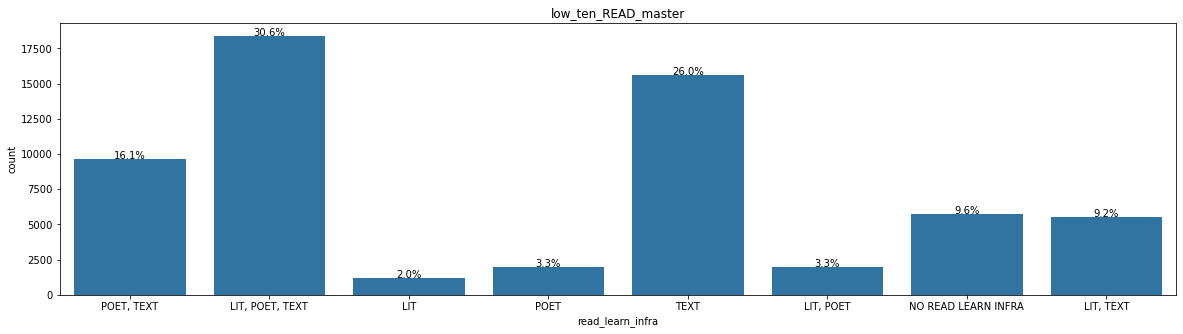

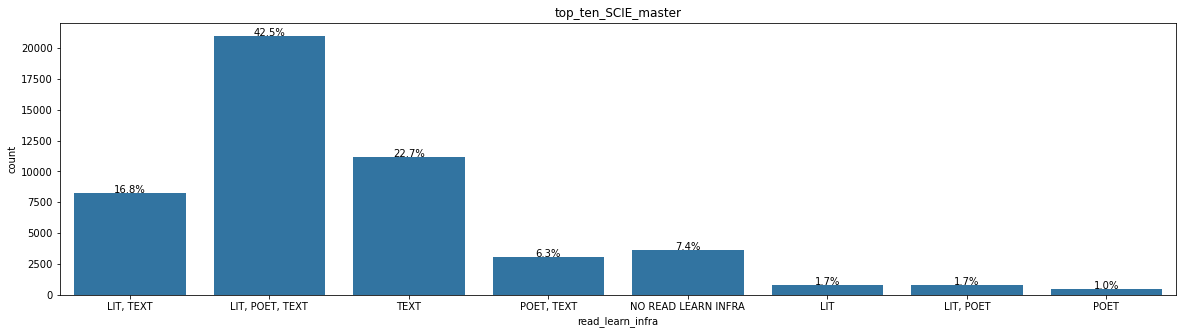

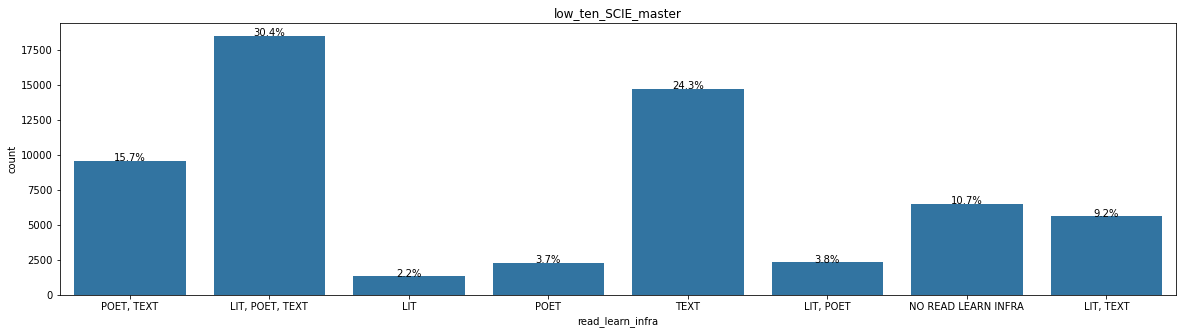

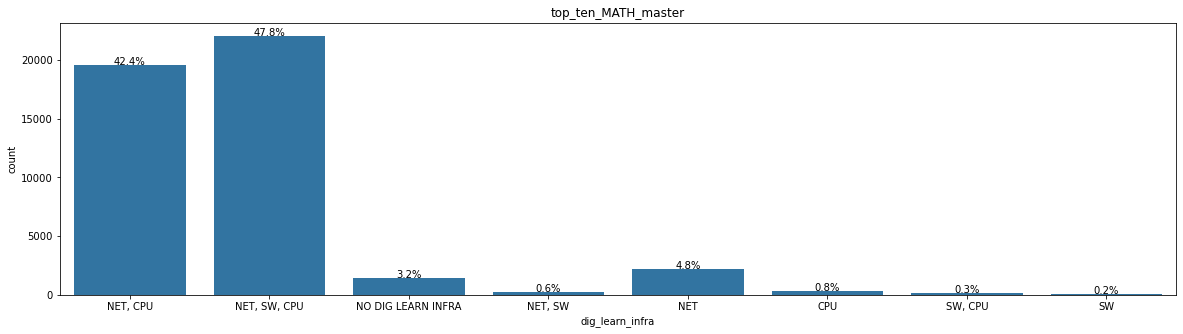

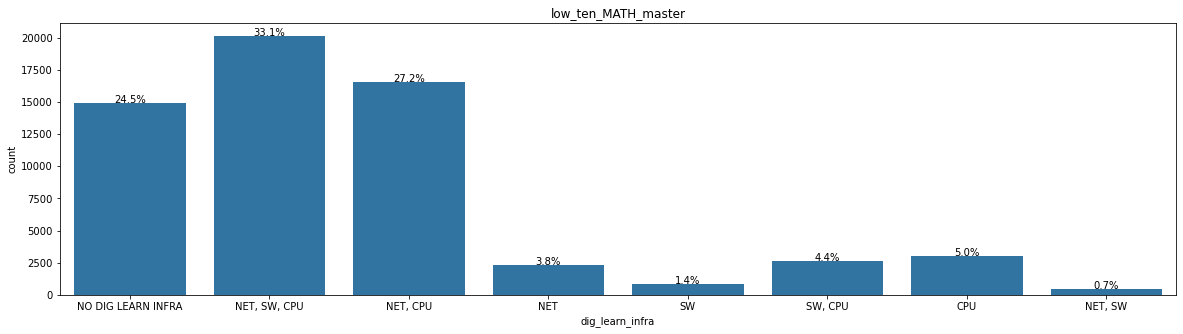

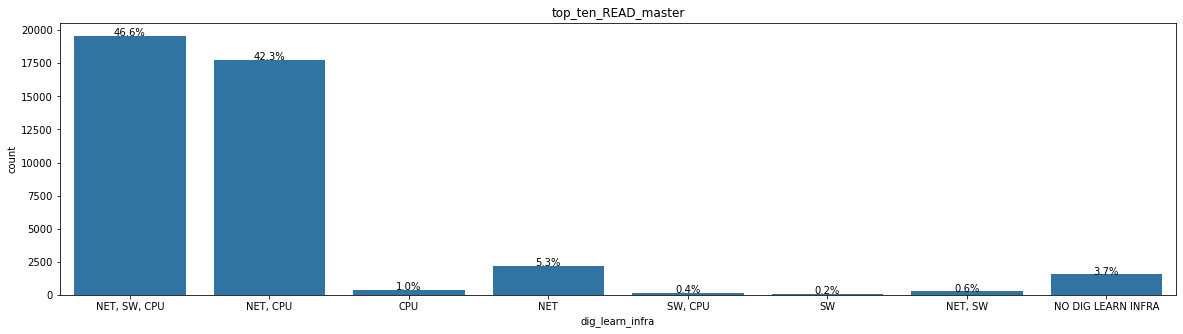

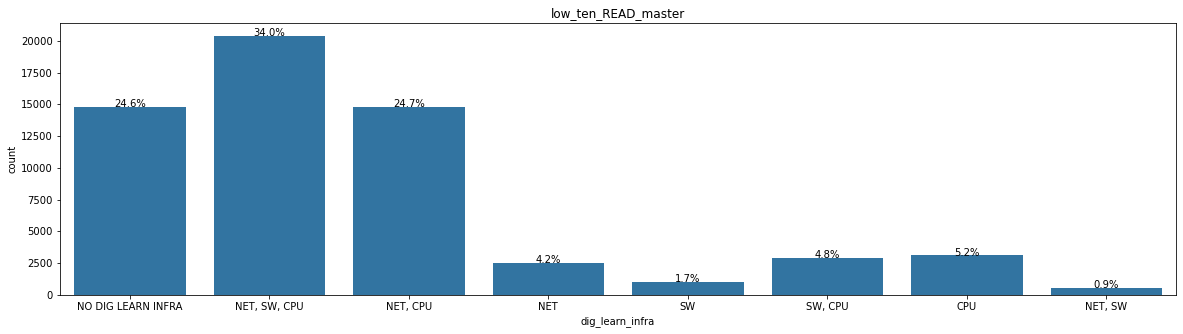

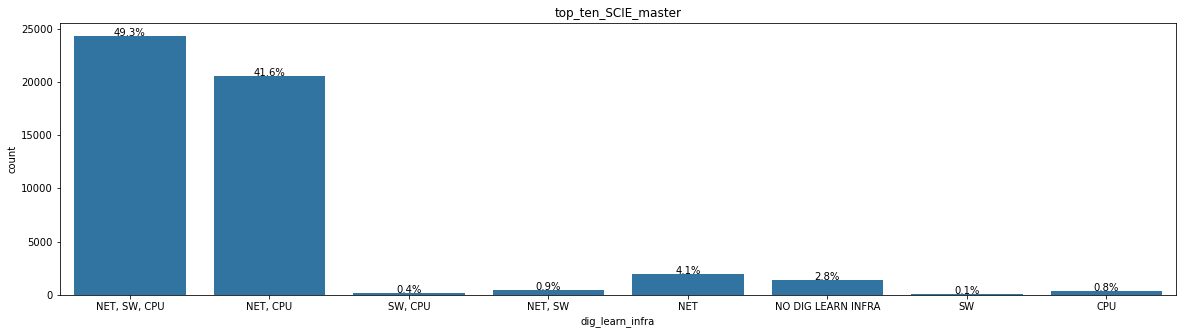

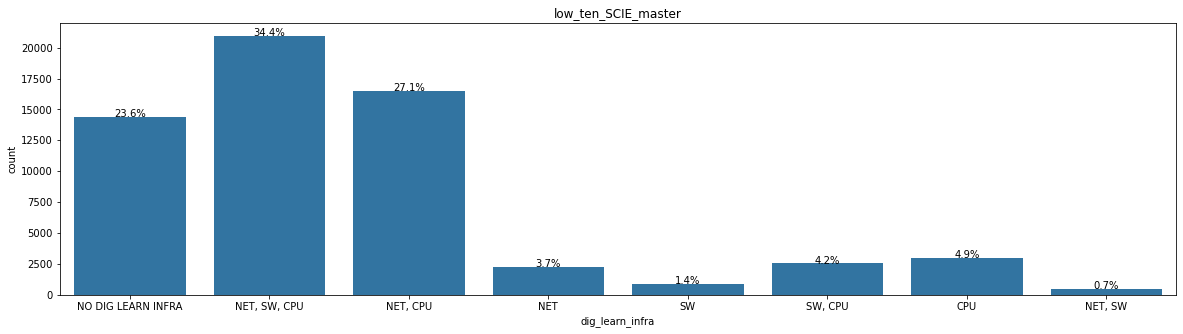

In [50]:
# loop for each learn infra to countplot top ten 
for i in list_infra:
    for key, value in dict_master_gb.items():
        countplot(value,i)
        plt.title(key)
        plt.show()

Most of the values for complete learning infrastrucutres are higher than the mean. But if you look at the top ten regarding Math and READ 47.8%/46.6% have NET, SW and a CPU, but the mean shows 48.7% with a complete digital learning infrastrucutre. Only the SCIE top ten have 49.3% and are a little bit above the mean. This tells us that learning infrastructure is not the only ingridient for top cognitive performance. Looking at the low_ten the  digital infrastructure for 23.6%-24.6% is not available, compared to 9,5% of the mean and 2,8-3,7 of the top_ten. 
For the reading infrastructure the differences are not so big, but have the same tendency. The low ten for reading have less "NO READ INFRA" (9.6%) than the mean (10.6%).
The general learning infrastructure has the expected tendencies with relativly small diferences.

## Multivariate Exploration

In the part of the multivariate analysis I'm going to provide a Facet Grid of sheatmap and scatterplots to examine two fields of expertise regarding the three earning infarstructure variables. 

### Scatterplot in a Facet Grid for learning infrastructure and fields of expertise

The first one illustrates the correlation of Math and Science for each learning infrastructure.

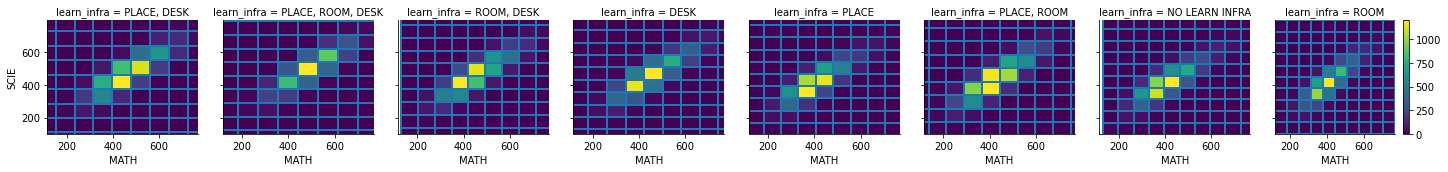

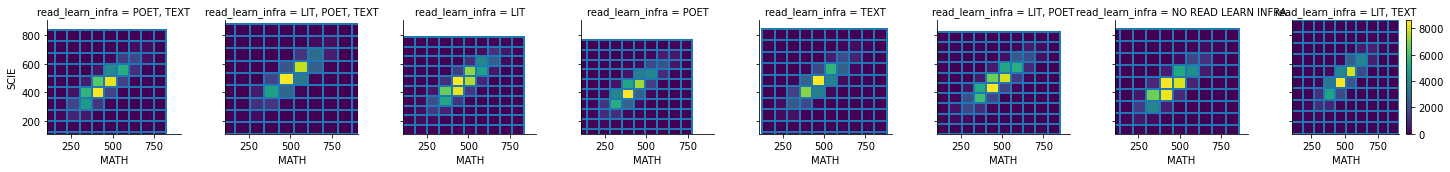

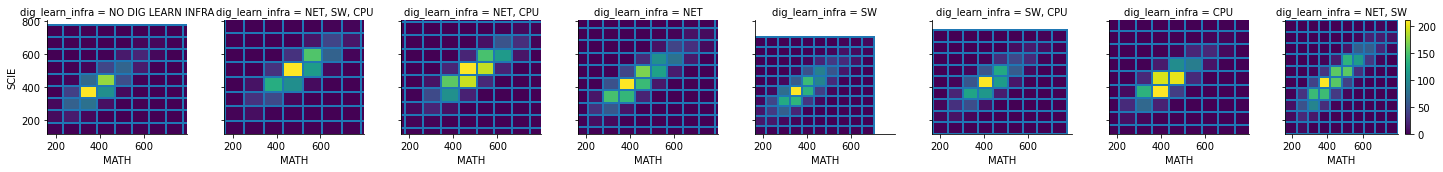

In [51]:
for i in list_infra:
    g = sns.FacetGrid(data = df_master, col = i, height = 2.5, margin_titles = True)
    g.map(plt.hist2d, 'MATH', 'SCIE')
    plt.colorbar();

As shown above Math and Science have a strong correlation. The distribution of the number of students taking the performance and learning infrstructure varibale into account has no unexpected result as most of the variables have already been discussed.

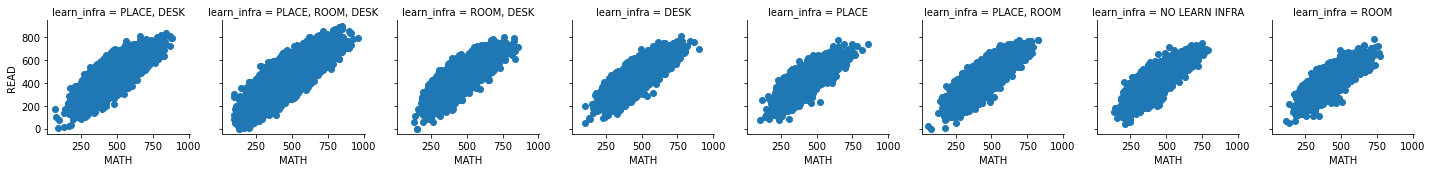

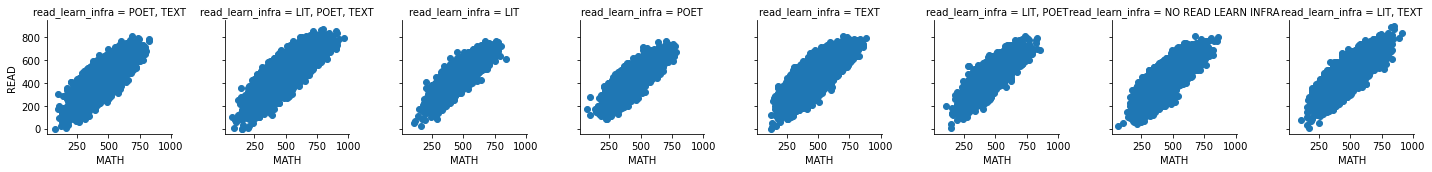

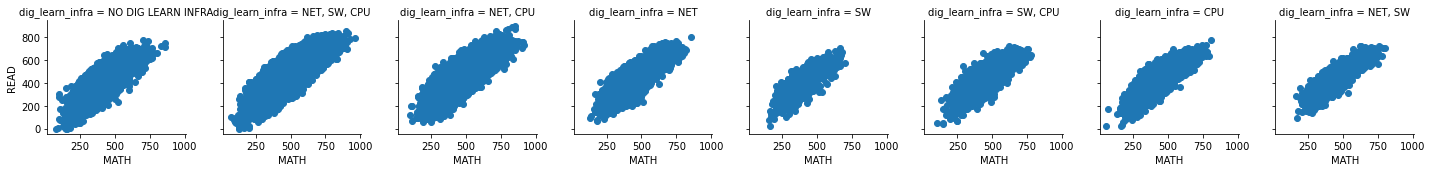

In [52]:
for i in list_infra:
    g = sns.FacetGrid(data = df_master, col = i, height = 2.5, margin_titles = True)
    g.map(plt.scatter, 'MATH', 'READ');

The scatterplot does not show the distribution of students as clear as a heatmap, especially in a Facet Grid.

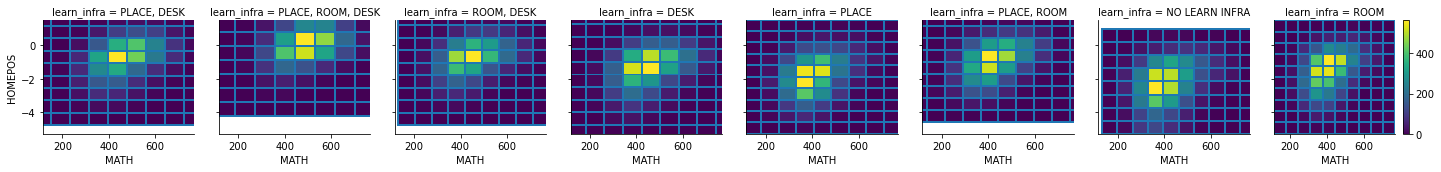

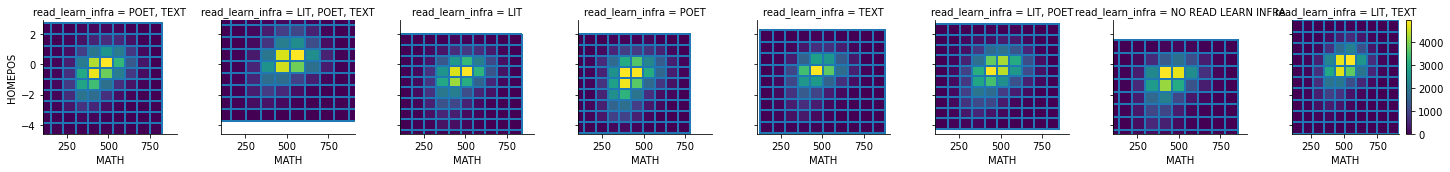

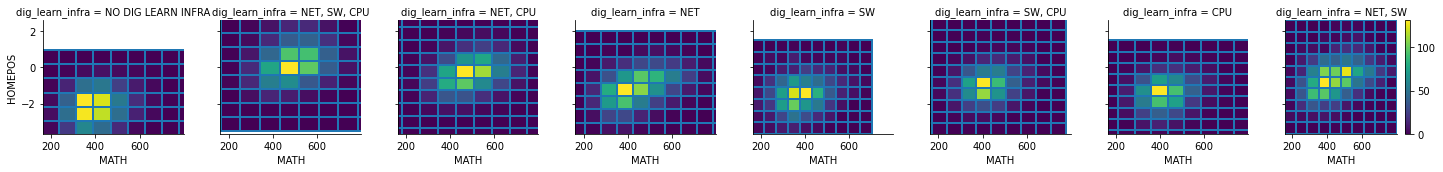

In [53]:
for i in list_infra:
    g = sns.FacetGrid(data = df_master, col = i, height = 2.5, margin_titles = True)
    g.map(plt.hist2d, 'MATH', 'HOMEPOS')
    plt.colorbar();

The last heatmap shows the correlation to a numerical environmental variable HOMEPOS, that had the strongest correlation to the fields of expertise compared to WEALTH and PARED. The complete learning infrastructure has higher number above 0 for the HOMEPOS variable. Without learning has most of the values below 0, only the reading infrastructure is has not so clear differneces.

### Correlations for grouped dataframes for learning infrastructure

                      HOMEPOS      PARED    WEALTH        MATH        READ  \
read_learn_infra                                                             
LIT                 -0.830059  12.643294 -0.575395  466.837666  467.764059   
LIT, POET           -0.538988  13.053452 -0.573709  468.490849  473.340778   
LIT, POET, TEXT      0.317563  13.973502 -0.117031  506.257112  508.973702   
LIT, TEXT           -0.188028  13.358681 -0.236245  495.878442  498.617012   
NO READ LEARN INFRA -1.203866  11.907596 -0.565527  443.827667  441.023065   
POET                -0.989002  11.945676 -0.694264  424.720120  428.665444   
POET, TEXT          -0.424163  12.505328 -0.464571  446.730154  453.030792   
TEXT                -0.601318  12.601308 -0.337169  469.204684  469.763514   

                           SCIE  
read_learn_infra                 
LIT                  472.759684  
LIT, POET            476.389515  
LIT, POET, TEXT      512.131027  
LIT, TEXT            501.617881  
NO READ LEARN I

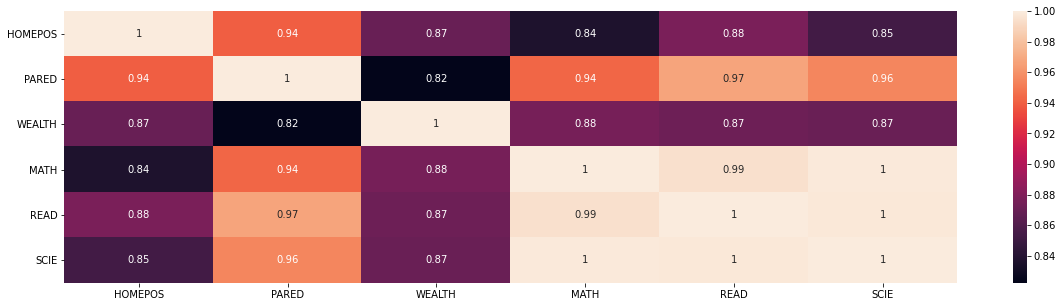

                     HOMEPOS      PARED    WEALTH        MATH        READ  \
dig_learn_infra                                                             
CPU                -1.393535  11.139503 -1.429178  424.182311  431.818613   
NET                -1.136204  12.160089 -0.795788  442.845078  440.083501   
NET, CPU           -0.335983  13.252796 -0.146980  488.708502  490.064634   
NET, SW            -0.632322  13.241688 -0.601821  447.683587  444.845752   
NET, SW, CPU        0.276347  13.857189  0.119617  497.094123  498.018138   
NO DIG LEARN INFRA -2.258947   9.652658 -2.295897  399.061264  407.585393   
SW                 -1.522450  11.201493 -1.755121  383.431190  387.427553   
SW, CPU            -0.944903  12.059876 -1.276273  425.741616  430.314596   

                          SCIE  
dig_learn_infra                 
CPU                 433.287563  
NET                 448.103613  
NET, CPU            494.415068  
NET, SW             455.012921  
NET, SW, CPU        501.935558 

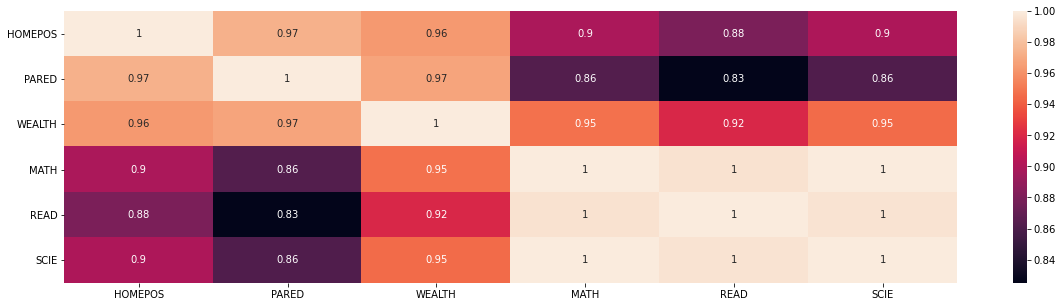

                    HOMEPOS      PARED    WEALTH        MATH        READ  \
learn_infra                                                                
DESK              -1.350386  11.746679 -1.327783  456.447771  459.522274   
NO LEARN INFRA    -2.356837  10.268468 -1.982347  412.266771  418.413517   
PLACE             -1.807497  10.422956 -1.747014  411.410042  422.496984   
PLACE, DESK       -0.731281  12.366096 -0.951788  468.566559  474.264549   
PLACE, ROOM       -0.923063  11.950639 -0.530055  428.380975  438.402864   
PLACE, ROOM, DESK  0.090971  13.638561  0.029802  494.787020  494.986338   
ROOM              -1.531749  11.206029 -0.928751  413.926853  419.349711   
ROOM, DESK        -0.756434  12.760873 -0.514400  453.909674  454.819722   

                         SCIE  
learn_infra                    
DESK               461.244952  
NO LEARN INFRA     417.782240  
PLACE              421.411009  
PLACE, DESK        474.303077  
PLACE, ROOM        439.901856  
PLACE, ROOM, DE

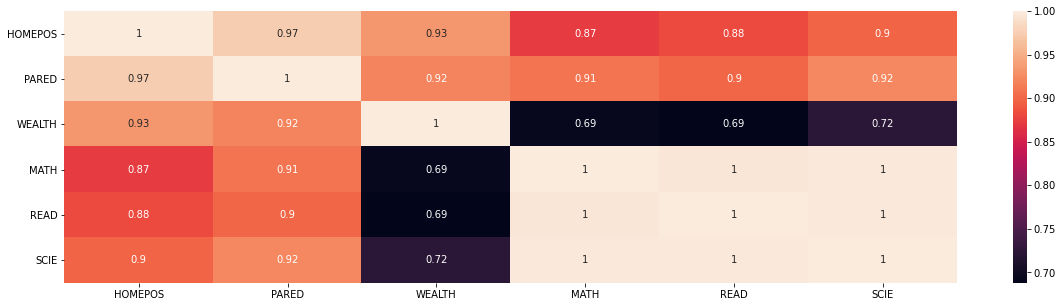

In [54]:
for i in list_infra_gb:
    print(i)
    cor(i)

Looking at the correlations within the Dataframes grouped by the learnig infratstructures, the values increased and the scale starts now with values of 0.7 (read_learn_infra) and 0,84 (dig_learn_infra and learn_infra). The parents eduction has the strongest correlation to the performance values for the general and the reading infratstructure. The digital infrastructure has the highest correlation to the WEALTH variable in this constellation. The correlations of df_master were stronger for the HOMEPOS variable than for WEALTH and PARED.